In this Notebook we design gates with constant torsion. To do this we start from a curve that has constant torsion and an experimental friendly curvature

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In the following cell we define some of the elliptic functions we will be using a lot through out this notebook.

In [3]:
from scipy.special import ellipk, ellipkm1, ellipe, ellipeinc, ellipkinc, ellipj

# COMPLETE elliptic integral of FIRST kind 
def K_(p):
    return ellipk(p)*(p<=0.8) + ellipkm1(1- p) * (p>0.8)

# COMPLETE elliptic integral of SECOND kind
def E_(p):
    return ellipe(p)

# elliptic sine
def sn_(x,p=1):
    SN, _, _, _ = ellipj(x, p)
    return SN

# elliptic cosine
def cn_(x,p=1):
    _, CN, _, _ = ellipj(x, p)
    return CN


def dn_(x,p=1):
    _, _, DN, _ = ellipj(x, p)
    return DN


def am_(x,p=1):
    _, _, _, AMM= ellipj(x, p)
    return AMM


def lambda_func(p,sigma): 
    """Lambda function defined  "Backlund transformations and knots of constant torsion"  
       see Eq.(9)"""
    p_2 = p**2                                                                                  # geometric modulus squared
    E_p = E_(p_2)                                                                               # Complete eliptic integral of Second kind
    mu  = (1/4) * np.sqrt( (p**-2 - sigma**2)**2 + 4*sigma**2)

    lambda_1 = (sigma**2 - (p**-2) + 2) / 4                                                     # see page 9 
    ksi      = np.pi/2 - 2*np.arctan(2*sigma / (p**-2 - sigma**2 + 4*mu))                       # see Eq.(9)

    E_ksi_p_prime = ellipeinc(ksi,1-p_2)                                                        # Incomplete of Second kind                   
    F_ksi_p_prime = ellipkinc(ksi,1-p_2)                                                        # Incomplete of First kind

    Lambda = E_ksi_p_prime + (E_p/K_(p_2) - 1)* F_ksi_p_prime + lambda_1*p*sigma/mu             # see Eq. (9)

    return Lambda


def F_fun(p, sigma):
    """F(ksi,p) defined  "Backlund transformations and knots of constant torsion"  
       see Eq.(9)"""
    p_2 = p**2                                                                                  # geometric modulus squared
    mu  = (1/4) * np.sqrt( (p**-2 - sigma**2)**2 + 4*sigma**2)

    ksi = np.pi/2 - 2*np.arctan(2*sigma / (p**-2 - sigma**2 + 4*mu))

    F_ksi_p_prime = ellipkinc(ksi,1-p_2)
    
    return F_ksi_p_prime

# === Central difference for derivatives ===
def central_diff(f, dt):
    df       = np.zeros_like(f)
    df[1:-1] = (f[2:] - f[:-2]) / (2 * dt)
    df[0]    = (f[1] - f[0]) / dt
    df[-1]   = (f[-1] - f[-2]) / dt
    return df

Next, we use analytical results from "Backlund transformations and knots of constant torsion" paper by Annalisa Calini, Thomas Ivey. See section 1.3. We choose the parameters such that our constant torsion curve is always closed. This curve will be our ansatz.

7.1047404916268535 53.79112702058557
8.093463357412912
0.601843746781181


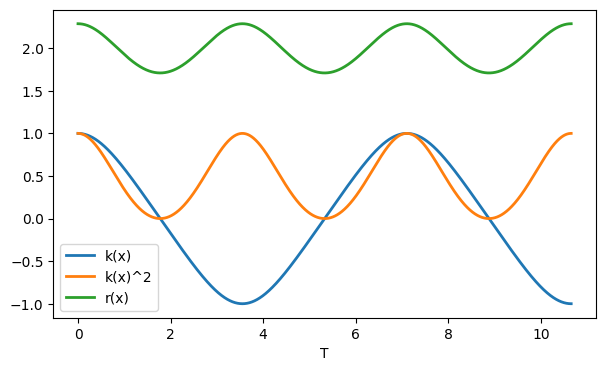

In [4]:
points = 2**15                                                  # points for computations
k_0    = 1                                                      # curvature maximum amplitude
p      = [0.9089085, 0.63093, 0.48465,  0.3920856, 0.3287, 0.2828, 0.248060, 0.220853, 0.1990026][1]                    # geometrical modulus needed for the elliptic functions
p      = 0.63093
p_2    = p**2                                                   # we use p^2 for the elliptic functions/integrals

s      = np.linspace(0.,3*2*p*2*K_(p_2),points)                 # arclecngth. s[-1] is defined by the  ********* EXPLAIN ABOUT THE FINAL VALUE!!!!
x      = k_0*s / (2*p)                                          # our free parameter

E_p    = E_(p_2)                                                # Complete elliptic integral of Second kind

sigma_2  = (1/p**2) * (2*E_p/K_(p_2) - 1)                       # see Eq(8) in "Backlund transformations and knots of constant torsion" 
sigma    = np.sqrt(sigma_2)                                     # goes to zero at    p = 0.908908557548499


mu    = (1/4) * np.sqrt( (p**-2 - sigma**2)**2 + 4*sigma**2)    # parameter needed for the analytics, see pg 8-9

m     = (16*mu**2) / ((p**-2 + sigma**2)**2)                    # --

a     = 4*mu / (p* (p**-2 + sigma**2))                          # --

lambda_1 = (sigma**2 - p**-2 + 2) / 4                           # --


curvature = k_0 * cn_(x,p_2)                                    # Curvature analytical function, see pg 8

r_polar = (1/mu) * np.sqrt((1/m) - sn_(x,p_2)**2)               # curve POLAR radius see pg 8

# === Plotting ===
fig, ax = plt.subplots(1, figsize=(7, 4))
ax.plot(x, curvature, linewidth = 2, label = "k(x)") 
ax.plot(x, curvature**2, linewidth = 2, label = "k(x)^2") 
ax.plot(x, r_polar,linewidth = 2, label = "r(x)")
ax.set_xlabel("T")
ax.legend()


print(2*2*K_(p_2), x[-1]*2*p*4)

print((sigma/2)* 2*p * x[-1])

print(sigma/2)

Now let's compute \theta(x), θ(x), coordinate by integrating the differential equation given in page 8 of the paper. 

Here we also double check the following:
- Δθ = - 2K(p^2)Λ(σ,p)
- for p = 0.63093, and s_max = 2p 2K(p^2) ---> Δθ/2π = - 1/3.   
-                      s_max = 3 * 2p *2K(p^2)   we get  Δθ/2π = -1  

Other checks one can do are the following 
- Δθ/2π --> 0     as p--> 0
- Δθ/2π --> -1/2  as p--> p_max = 0.908908557548499

                 Δθ/2π
Numerical  = -1.0000093168699347
Analytical = -1.000009316869933


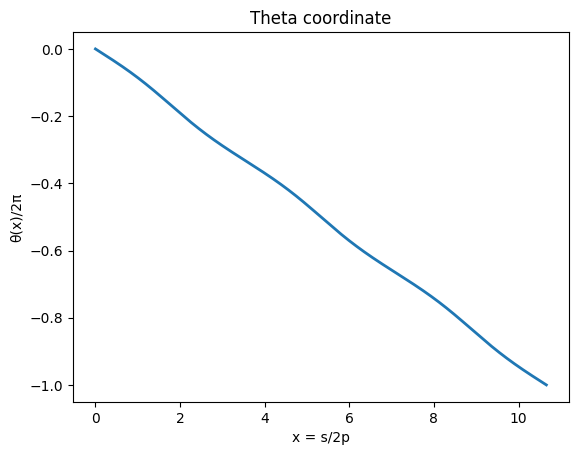

In [5]:
q  = (p**-2 - 1) * (p**-2 - sigma**2) / (2*(p**-2 + sigma**2))                                              # constant factor, see the equation
dx = x[1] - x[0]                                                                                            # integration step

theta_x  = -(p*sigma/mu) * ( lambda_1*np.cumsum(np.ones(points)) + q * np.cumsum(1/(1-m*sn_(x,p_2)**2)))*dx # final formula, numerical integration

delta_theta_num = (theta_x[-1] - theta_x[0]) / (2*np.pi)                                                     # Δθ/2π numerical value
delta_theta     = -2*K_(p_2) * lambda_func(p,sigma) / (2*np.pi)                                              # Δθ/2π analytical value

print("                 Δθ/2π")
print("Numerical  =",delta_theta_num)
print("Analytical =",delta_theta * s[-1]/(2*p*2*K_(p**2)))                                                  # multiply with the number of "periods"

# === Plotting ===
fig, ax = plt.subplots()
ax.plot(x, (theta_x - theta_x[0])/(2*np.pi), linewidth = 2)
ax.set_xlabel("x = s/2p")
ax.set_ylabel("θ(x)/2π")
_ = ax.set_title("Theta coordinate")

Next thing we can do is to get the Frenet frame numerically. We can do this using the curve coordinates given in the paper. 

Equation (11) gives the cartesian x,y components while Eq.(12) gives the z component in w.r.t. "x". 

$\begin{equation} x(x) = r \cos\theta = \sqrt{\frac{2K p'}{\pi p}} \cdot 
\frac{
  e^{-i \Lambda x} \, \Theta_1(x - i \hat{F}) + e^{i \Lambda x} \, \Theta_1(x + i \hat{F})
}{
  2\mu \, \Theta(x) \, H_1(i \hat{F})
}\end{equation}
$
$\begin{equation} y(x) = r \sin\theta = \sqrt{\frac{2K p'}{\pi p}} \cdot 
\frac{
  e^{-i \Lambda x} \, \Theta_1(x - i \hat{F}) - e^{i \Lambda x} \, \Theta_1(x + i \hat{F})
}{
  2\mu \, \Theta(x) \, H_1(i \hat{F})
}\end{equation}
$

$\begin{equation}
z(x) = \frac{1}{\mu p} \frac{\Theta'(x)}{\Theta(x)} =  \frac{1}{\mu p} Z(x,p)
\end{equation}
$

where $\hat{F} = F(\xi, p)$ and $\Lambda = \Lambda(\sigma, p)$ are defined in the paper analytically. Also, $\Theta, \Theta _1, \Eta _1$ are Jacobi theta functions (cf formula 434.01 in Byrd and Friedman), while $Z(x,p)$ is the Jacobi zeta function (cf formula 905.01 in in Byrd and Friedman)

In the next cell we define all the needed functions to compute these expressions




In [6]:
def Theta_(p, x, N = 200):
    # Theta_0 function 
    # N : number of orders in the summation

    p_2       = p**2
    p_2_prime = 1 - p_2
    Kp        = K_(p_2)
    Kp_prime  = K_(p_2_prime)
    q         = np.exp(-np.pi * Kp_prime/Kp)
    u         = x*np.pi/(2* Kp)

    m     = np.arange(1, N+1)[:, np.newaxis]  # shape (N, 1)
    u     = np.atleast_1d(u)[np.newaxis, :]  # ensures u has shape (1, M)

    terms = (-1)**m * q**(m**2) * np.cos(2 * m * u)  # shape (N, M)

    return 1 + 2 *np.sum(terms, axis =0)                   


def Theta_1(p, x, N = 200):
    # Theta_1 function 
    # N : number of orders in the summation
    p_2       = p**2
    p_2_prime = 1 - p_2
    Kp        = K_(p_2)
    Kp_prime  = K_(p_2_prime)
    q         = np.exp(-np.pi * Kp_prime/Kp)
    u         = x*np.pi/(2* Kp)

    m     = np.arange(1, N+1)[:, np.newaxis]  # shape (N, 1)
    u     = np.atleast_1d(u)[np.newaxis, :]  # ensures u has shape (1, M)

    terms = q**(m**2) * np.cos(2 * m * u)  # shape (N, M)

    return 1 + 2 *np.sum(terms, axis =0)   


def Eta_1(p, x, N = 200):
    # Eta_1 function 
    # N : number of orders in the summation
    p_2       = p**2
    p_2_prime = 1 - p_2
    Kp        = K_(p_2)
    Kp_prime  = K_(p_2_prime)
    q         = np.exp(-np.pi * Kp_prime/Kp)
    u         = x*np.pi/(2* Kp)

    m     = np.arange(1, N+1)[:, np.newaxis]  # shape (N, 1)
    u     = np.atleast_1d(u)[np.newaxis, :]  # ensures u has shape (1, M)


    terms = q**((m - 1/2)**2) * np.cos( (2*m-1) * u)  # shape (N, M)

    return 2 *np.sum(terms, axis =0)


def Rcostheta(p, sigma, mu, x):
    # X component 
    # N : number of orders in the summation
    p_2     = p**2
    p_prime = np.sqrt(1-p_2)

    c1 = np.sqrt(2*K_(p_2)*p_prime / (p*np.pi))

    Lambda = lambda_func(p, sigma)
    F_hat  = F_fun(p,sigma)

    THETA_0 = Theta_(p, x ,200)

    THETA_1a = Theta_1(p, x - 1j*F_hat ,200)
    THETA_1b = Theta_1(p, x + 1j*F_hat ,200)

    ETA_1   = Eta_1(p, 1j*F_hat ,200)

    numerator = np.exp(-1j * Lambda *x) * THETA_1a + np.exp(1j * Lambda * x) * THETA_1b
    denom     = 2 * mu * THETA_0 * ETA_1

    return c1 * numerator/denom

def Rsintheta(p, sigma, mu, x):
    # Y component
    # N : number of orders in the summation
    p_2     = p**2
    p_prime = np.sqrt(1-p_2)

    c1 = np.sqrt(2*K_(p_2)*p_prime / (p*np.pi))

    Lambda = lambda_func(p, sigma)
    F_hat  = F_fun(p,sigma)

    THETA_0 = Theta_(p, x ,200)

    THETA_1a = Theta_1(p, x - 1j*F_hat ,200)
    THETA_1b = Theta_1(p, x + 1j*F_hat ,200)

    ETA_1   = Eta_1(p, 1j*F_hat ,200)

    numerator = np.exp(-1j * Lambda *x) * THETA_1a - np.exp(1j * Lambda * x) * THETA_1b
    denom     = 1j * 2 * mu * THETA_0 * ETA_1

    return c1 * numerator/denom

def jacobiZ(p,x, N=200):
    # Jaobi Z function
    # N : number of orders in the summation
    p_2       = p**2
    p_2_prime = 1 - p_2
    Kp        = K_(p_2)
    K_p_prime = K_(p_2_prime)

    m     = np.arange(1, N+1)[:, np.newaxis]  # shape (N, 1)
    u     = np.atleast_1d(x)[np.newaxis, :]  # ensures u has shape (1, M)

    terms = np.sin(m * np.pi * u / Kp) / np.sinh(m * np.pi * K_p_prime / Kp)  # shape (N, M)

    return (np.pi/Kp) *np.sum(terms, axis =0)

def zeta_x(p,mu, x, N=200):
    # Z component using Jacobi function
    # N : number of orders in the summation
    return (1/(mu * p)) * jacobiZ(p, x, N)

def zeta_x2(p,mu, x, N=200):
    # Z component using Theta function and its derivative
    # N : number of orders in the summation
    THETA_0       = Theta_(p,x, N)
    dx            = x[1] - x[0]
    THETA_0_prime = central_diff(THETA_0, dx)

    return (1/(mu * p)) * THETA_0_prime / THETA_0


Now we can plot the curve!!

--------------------------------------------------------------------------------------------------------
Closed curve. Δr =  0.0001339161007533507
It is not 0 because of a numerical issue withath Rsintheta function. It doesn't matter because we optimize it later on 
--------------------------------------------------------------------------------------------------------


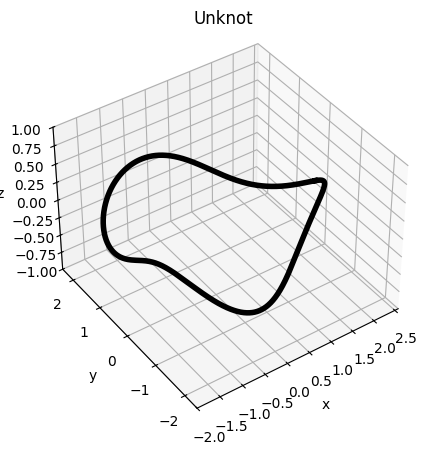

In [7]:
#rx = Rcostheta(p, sigma, mu, x)                     # x - analytical
# ry = Rsintheta(p, sigma, mu, x)                     # y - analytical

rx_num = r_polar * np.cos(theta_x)                  # x - numerical
ry_num = r_polar * np.sin(theta_x)                  # y - numerical

zx1 = zeta_x(p,  mu, x)                             # z - through Jacobi Zeta func

# === Plotting ===
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(rx_num, ry_num, zx1, color='black', linewidth = 4.)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim([-1, 1])
ax1.view_init(elev=40, azim=-125)  # <- Change the camera view


r = np.vstack((rx_num, ry_num, zx1)).T              # THE CURVE

print("--------------------------------------------------------------------------------------------------------")
print("Closed curve. Δr = ", np.linalg.norm(r[0,:] - r[-1,:]))
print("It is not 0 because of a numerical issue withath Rsintheta function. It doesn't matter because we optimize it later on ")
print("--------------------------------------------------------------------------------------------------------")


In the following cell we use Fourier series expansion solve the Frenet-Serret equation and show that we can make the curve completely closed. This approach give a glimpse to the reader of how we will use the above ansatz to design closed constant torsion curves that lead to specific unitaries.

In [8]:
def fourier_coefs(t, y, N_order):
    """ This function computes the Fourier series coefficients
     Inputs:
        t       : time vector
        y       : function we want to expand in Fourier series
        N_order : highest order we keep in the expansion
    Outputs:
        c_n     : complex fourier coeefficients     
        
    """
    period   = t[-1] - t[0]                                     # time windows in which we compute the Fourier expansion
    N_order += 1                                                # total orders, we start from 0-th order DC component 
    c_n       = np.zeros(N_order)*(1+1j)                        # initialize the array of coefficients
    c_n[0]    = y.sum()/y.size                                  # 0th order coefficient, DC component
    
    for n in range(1,N_order):
       c      = y*( np.cos(2*n*np.pi*t/period) + 1j* np.sin(2*n*np.pi*t/period) )     # integrant
       c_n[n] = 2 * np.sum(c)/c.size                                                  # numerical integration

    return c_n

def f_in_FS(t, cn):
    """ This function computes the Fourier expansion
    Inputs:
        t   : time vector
        cn  : complex Fourier coefficients 
    Outputs:
        f   : Fourier expansion  
    """
    period        = t[-1] - t[0]                                # time windows in which we compute the Fourier expansion
    c_n_real      = np.real(cn)                                 # cosine coefs
    c_n_imaginary = np.imag(cn)                                 # sine coefs
    f             = c_n_real[0] * np.ones(len(t)) + 1j*0        # DC componenet

    for n in range(1,len(cn)):
        f += c_n_real[n] * np.cos(n * 2*np.pi * t/period) + c_n_imaginary[n] * np.sin(n * 2*np.pi *t/period)  # add order by order
   
    return f

--------------------------------------------------------------------------------------------------------
Relative error = (0.0019208331913449625+0j)
--------------------------------------------------------------------------------------------------------
10.65711073744028 0.63093 0.601843746781181 1.26186


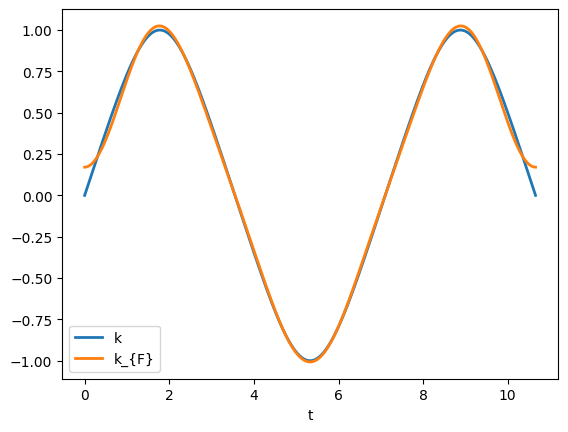

In [9]:
""" Note that the curvature we have is not exactly periodic in the given interval, actually it has 1.5 periods in the time window.
    So, in order to help the Fourier expansion and truncate it to the lowest possible order, we shift a curvature so that it fits
    exactly one period in it. In other words, it is as if we start traversing the curve from a later point """


N_points = 2**10                                         # reduce the number of points to make the later optimization faster
T_g      = x[-1]
time     = np.linspace(0, x[-1], N_points)              # same time window
dt       = time[1] - time[0]                            # dt = dx
y_kappa  = cn_(time - 1*K_(p_2), p_2)
# y_kappa  = np.append(cn_(time - 1*K_(p_2), p_2) ,cn_(time - 1*K_(p_2), p_2))                     # shifted curvature  se the figure below
# time     = np.linspace(0, x[-1], N_points*2)              # same time window
# y_kappa  *= y_kappa                      # try also this

 

# find the lowest order in the Fourier expansion to achieve a good approxmation
cost  = 1.                                              # cost or error
ordr  = 0                                               # highest order
for q in range(1, 5):
    F_order = q
    cn      = fourier_coefs(time, y_kappa, F_order)     # compute the coefs
    f_t     = f_in_FS(time, cn)                         # get the fourier expansion

    denominator = np.sum(f_t**2)                        # compute relative error
    numerator   = np.sum((y_kappa-f_t)**2)  
    relative_error = numerator / denominator            # here
    if relative_error < cost :                  
        cost = relative_error
        ordr = q                                        # store the order
        CN   = cn                                       # store the coefs

F_order = ordr                                          # use the order you found above
f_t     = f_in_FS(time, CN)                             # compute the expansion

denominator    = np.sum(f_t**2)
numerator      = np.sum(np.abs(y_kappa -f_t)**2)           
relative_error = numerator / denominator

print("--------------------------------------------------------------------------------------------------------")
print("Relative error =", relative_error)               # print the relative error
print("--------------------------------------------------------------------------------------------------------")

# ----- plots -------
fig, ax = plt.subplots()
ax.plot(time, y_kappa, label = 'k', linewidth = 2)
ax.plot(time, np.real(f_t),     label = 'k_{F}', linewidth = 2)
ax.set_xlabel("t")
ax.legend();


print(time[-1], p, sigma/2, 2*p)

For the optimization we need two functions, one for solving the Frenet-Serret equations and one where we optimize the curvature and the constant torsion using a scipy solver

In [10]:
print(x[-1]*2*p * sigma/2)

8.093463357412912


In [11]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import least_squares

def frenet_rhs(t, Y, kappa_fun, tau_fun, speed_fun):
    """ This function computes the LHS of the FS equations  
    Inputs:
        t         : time vector
        Y         : TNB vectors at t=0
        kappa_fun : curvature
        tau_fun   : torsion
        speed_fun : speed function
    Outputs:
        dT, dN, dB : left hand side of FS equations
    """
    T = Y[0:3]                                  # initial Tangent
    N = Y[3:6]                                  # initial Normal
    B = Y[6:9]                                  # initial Binormal

    k   = kappa_fun(t)                          # curvature non-constant
    tau = tau_fun                               # torsion here is constant !!
    v   = speed_fun                             # speed here is constant !!! 

    dT = v * k * N                              # FS equations
    dN = v * (-k * T + tau * B)                 #
    dB = v *(-tau * N)                          #

    return np.concatenate([dT, dN, dB])


def pulse_optimizer(c_n, Y0, time, speed, R_target):
    
    T0 = Y0[0:3]                                                                    # inital T, N, B vectors
    N0 = Y0[3:6]                                                                    #
    B0 = Y0[6:9]                                                                    #

    l         = int((len(c_n)-2)/2)                                                 # first "2*l" elements are the Fourier coeffs
    cn        = c_n[0:l] + 1j*c_n[l :-2]                                            # fourier coefs         (to be optimized)
    ampl      = c_n[-2]                                                             # curvature amplitude   (to be optimized)
    c_t       = c_n[-1]                                                             # constant torsion      (to be optimized)

  
    time = np.linspace(0, T_g, 2**10)
    
    curvature = ampl * f_in_FS(time, cn)                                            # compute the curvature
    # torsion   = c_t                                                               # constant torsion
    

    kappa_fun = interp1d(time, curvature, kind='cubic', fill_value="extrapolate")   # interp needed for sole_ivp

    """
    # tau_fun   = interp1d(time, torsion,   kind='cubic', fill_value="extrapolate")      #
    # taun_fun = c_t
    # speed_fun = interp1d(time, speed,     kind='cubic', fill_value="extrapolate")      #
    # speed_fun = speed 
    """

    sol = solve_ivp(                                                                # solve FS-equations for a set of (kappa, tau)
        fun    = lambda t, y: frenet_rhs(t, y, kappa_fun, c_t, speed, ),
        t_span = (time[0], time[-1]),
        y0     = Y0,
        t_eval = time,
        method = 'RK45',
        rtol   = 1e-9,
        atol   = 1e-9
    )

    T = sol.y[0:3, :].T                                                             # tangent vector T(t)  shape (N,3)
    N = sol.y[3:6, :].T                                                             # normal vector N(t)         (N,3)
    B = sol.y[6:9, :].T                                                             # binormal vector B(t)       (N,3)
    
    # dt  = time[1] - time[0]                                                       # dt needed for Tangent integration
    # r   = np.cumsum(T * speed[:,None], axis=0) * dt                               # curve 
    # r = np.cumsum(T, axis=0) * speed * dt
    # DR  = np.linalg.norm( r[-1,:] - r[0,:] )                                      # closure condition   (part of the cost function)
    r   = np.trapezoid(T, time*speed, axis=0)
    DR  = np.linalg.norm(r)
    eqs = []                                                                        # conte
    eqs.append(DR)                                                                  # closed curve condition

    #B_times_kappa = B * curvature[:, np.newaxis]                                    # B(t) * |curvature(t)|
    #integral      = np.trapezoid(B_times_kappa,time*speed, axis=0)                  # integral_0^Tg  B(t) * |curvature(t)| dt
    #tangent_area  = np.linalg.norm( integral)                                       # norm of total tangent area
    #eqs.append(tangent_area/10) 
    

    R_F_0  = np.array([-B0, N0, T0])                                                # initial frame matrix
    R_F_Tg = np.array([-B[-1,:], N[-1,:], T[-1,:]])                                 # frame matrix at t=T_g 
    R_u0     = R_F_Tg @ (R_F_0.T)                                                   # SO(3) gate matrix

    eqs.append(1- fidelity(R_u0, R_target))                                         # gate fidelity 

    eqs.append( R_u0[0,0] - R_target[0,0] )                                         # conditions for Ryz(pi/2) in SO(3)
    eqs.append( R_u0[1,1] - R_target[1,1] )                                         # these elements must be zero
    eqs.append( R_u0[2,2] - R_target[2,2] )
    eqs.append( R_u0[0,1] - R_target[0,1] )                                         # 
    eqs.append( R_u0[0,2] - R_target[0,2] )
    eqs.append( R_u0[1,2] - R_target[1,2] )

    
                                    
    eqs.append(0.0 if abs(np.real(curvature[0]))  < 1e-2 else np.real(curvature[0]) )   # pulse starts from 0
    eqs.append(0.0 if abs(np.real(curvature[-1])) < 1e-2 else np.real(curvature[-1]))   # pulse ends at 0

    #eqs.append(0.0 if abs(c_t)< 0.5 else c_t)                                      # torsion condition 
    #eqs.append(0.0 if abs(c_t)> 0.005 else 1/(c_t +1))                                      # torsion condition 
  
    # eqs.append(0.0 if  np.max(np.abs(curvature))*time[-1] < 20 else (20 - np.max(np.abs(curvature))*time[-1]) )

    #eqs.append(0.0 if abs(1/c_t) < 1000 else np.abs(1/c_t))

    # m1 = abs(c_t) * T_g
    # m2 = np.max( abs(curvature/(4*c_t)) )

    #eqs.append( 0.0 if m1 <= 1. else (m1 -1) )
    #eqs.append( 0.0 if m2 <= 1. else (m2 -1) )

    print(eqs[0:3])                                                                      # prints the values of the parameters you want to minimize

    return eqs


def R_rodrigues(v, theta):
    """ This function uses Rodrigues rotation formula and returns a rotation matrix of angle \theta around axis v
    Inputs:
        v       : unit vector in 3D space defining the axis of rotation
        theta   : angle of rotation
    Outputs:
        R       : rotation matrix in SO(3) """
    
    v = v / np.linalg.norm(v)                                       # make sure the vector is normalized
    vx = v[0]                                                       # x component
    vy = v[1]                                                       # y component
    vz = v[2]                                                       # z component
    K = np.array([[0., -vz, vy],                                    # K matrix (see Wikipedia Rodrigues rotation formula)
                  [vz, 0., -vx],
                  [-vy, vx, 0.]])
    K2 = K @ K                                                      # K^2 matrix 
    R = np.eye(3) + np.sin(theta)*K + (1-np.cos(theta)) * K2        # final rotation matrix
    return R

def fidelity(R_g, R_u0, d = 2):
    """ This function computes the fidelity between two 3x3 matrices. See Eq.(23) in "An automated geometric space curve approach for designing
        dynamically corrected gates"  """
    
    return (d + 1 + np.trace((R_g.T)  @ R_u0)) / (d * (d+1))

def adjoint_Representation(U):
    s_x = np.array([[0, 1],
                    [1, 0]])

    s_y = np.array([[0, -1j],
                    [1j, 0]])

    s_z = np.array([[1,  0],
                    [0, -1]])

    S = np.stack([s_x, s_y, s_z])
    
    R_U0 = np.zeros((3,3))
    U_dagger = U.conj().T

    for p in range(0,3):
        for q in range(0,3):
            R_U0[p, q] = np.real( (1/2) * np.trace(U_dagger @ S[p,:,:] @ U @ S[q,:,:]) )

    return R_U0

def expm(v, phi):
    s_x = np.array([[0, 1],
                    [1, 0]])

    s_y = np.array([[0, -1j],
                    [1j, 0]])

    s_z = np.array([[1,  0],
                    [0, -1]])
    v = v/np.linalg.norm(v)
    return np.cos(phi)*np.eye(2) + 1j*np.sin(phi) *(v[0] * s_x + v[1]*s_y + v[2]*s_z)

def print_matrix_sci(A, precision=3, width=10):
    """
    Pretty-print a 2D NumPy array in scientific notation,
    wrapped in an ASCII box:
      /          \
      | … matrix |
      \          /
    
    Parameters:
    - A: np.ndarray, 2D array (matrix)
    - precision: int, number of decimal places (default: 3)
    - width: int, total width of each printed element (default: 10)
    """
    if A.ndim != 2:
        raise ValueError("Input must be a 2D array (matrix).")
    
    rows, cols = A.shape
    # Format string for each element
    fmt = f"{{: {width}.{precision}e}}"
    # Compute the inner width: total characters in one row
    inner_width = cols * width + (cols - 1) * 1  # spaces between elements
    
    # Top border
    print("/" + " " * inner_width + "\\")
    # Matrix rows
    for row in A:
        line = " ".join(fmt.format(val) for val in row)
        print("|" + line + "|")
    # Bottom border
    print("\\" + " " * inner_width + "/")


In [12]:
name = 'R_z_pi_4_DR_BEST_2'

print(name)

B0 = [1., 0., 0.]                       # initial frame
N0 = [0., 1., 0.]
T0 = [0., 0., 1.]

Y0 = np.concatenate([T0, N0, B0])                                           # put the frame in a matrix

coeffs = load_coeffs(filename= name, fmt = 'csv', folder= 'results')
coeffs = list(coeffs)
speed  = coeffs.pop()
T_g    = coeffs.pop()
ct     = coeffs.pop()
ampl   = coeffs.pop()
coeffs = np.array(coeffs)
cn     = coeffs[:len(coeffs) //2 ] + 1j* coeffs[len(coeffs) //2: ]



CN = cn
c_t = ct

time = np.linspace(0,T_g,2^10)

R_z_pi_4_DR_BEST_2


NameError: name 'load_coeffs' is not defined

In [12]:
# ------ choose the gate in SU(2) representation -------------
# th_z       = 0*np.pi
#n_target   = [1,np.sin(th_z),np.cos(th_z)]                                                        # rotation axis 
n_target   = [0,0,1]                                                        # rotation axis 
phi_target = np.pi/2                                                       # angle, keep in mind the double cover !!! 
U_target   = expm(n_target, phi_target)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target   = adjoint_Representation(U_target)                               # R is the adjoint representation of the 

print(" ------------ U_target -----------")
print(U_target)
print(" ---------------------------------")
print(" ------------ R_target -----------")
print_matrix_sci(R_target)
print(" ---------------------------------")

B0 = [1., 0., 0.]                       # initial frame
N0 = [0., 1., 0.]
T0 = [0., 0., 1.]

Y0 = np.concatenate([T0, N0, B0])                                           # put the frame in a matrix

""" -------------------------------------- INITIAL GUESS ! -------------------------------------------------------- """
ampl  = 1.0001                                                                  # amplitude --> initial value
c_t   = sigma/2                                                             # torsion   --> initial value sigma/4 for my GATE
speed = 2*p                                                                 # speed here is constant because x = s/2p, 

exta_orders = 0                                                             # add some more fourier orders for more freedom to the solver
CN_extra    = np.ones(exta_orders) * (1 + 1j) *0.000001                        # set the extra coefficients to zero
CNN         = np.append(CN,CN_extra)                                        # total fourier coefs ---> initial values

""" --------------------------------------------------------------------------------------------------------------- """

initial_guess = np.concatenate([np.real(CNN), np.imag(CNN), [ampl, c_t]])   # initial values/guess

result = least_squares(pulse_optimizer, initial_guess, args=(Y0, time, speed, R_target, ),
                        method = 'trf', 
                        xtol = 1e-11,
                        gtol = 1e-11)

 ------------ U_target -----------
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j]]
 ---------------------------------
 ------------ R_target -----------
/                                \
|-1.000e+00  1.225e-16  0.000e+00|
|-1.225e-16 -1.000e+00  0.000e+00|
| 0.000e+00  0.000e+00  1.000e+00|
\                                /
 ---------------------------------
[np.float64(0.029452330456298054), np.float64(4.8980563429612545e-05), np.float64(0.00014694058203845728)]
[np.float64(0.02945240635645484), np.float64(4.8980555054978225e-05), np.float64(0.00014694055691455432)]
[np.float64(0.0294522315155454), np.float64(4.898011916187883e-05), np.float64(0.00014693924923581125)]
[np.float64(0.029452368537770834), np.float64(4.898037252465404e-05), np.float64(0.00014694000932369278)]
[np.float64(0.029452282412316518), np.float64(4.8980460441661045e-05), np.float64(0.00014694027307493585)]
[np.float64(0.029452313065990252), np.float64(4.8980509239182624e-05), np.float6

c:\Users\dakis\Documents\VT_Files\Python_projects\SCQC_First_steps\.venv\Lib\site-packages\scipy\integrate\_ivp\base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


[np.float64(0.02945233045632254), np.float64(4.8980563430056634e-05), np.float64(0.00014694058203934546)]
[np.float64(0.029452330456304934), np.float64(4.898056342972357e-05), np.float64(0.00014694058203945648)]
[np.float64(0.029452285071310893), np.float64(4.898011438803085e-05), np.float64(0.00014693923491448935)]
[np.float64(0.02945197627093416), np.float64(4.898056591084998e-05), np.float64(0.00014694058948250266)]
[np.float64(5.2311436456344635), np.float64(0.0852058272746703), np.float64(0.2515224343610627)]
[np.float64(2.282996375547985), np.float64(0.0004552205336919579), np.float64(0.0013472247426374873)]
[np.float64(0.16970048248307087), np.float64(6.210719734056624e-07), np.float64(1.8516135078527896e-06)]
[np.float64(0.16970058717189115), np.float64(6.210160673481013e-07), np.float64(1.8514457227336578e-06)]
[np.float64(0.1697003352136477), np.float64(6.210883194412986e-07), np.float64(1.8516625219788807e-06)]
[np.float64(0.1697003564120226), np.float64(6.210484800872607e-0

KeyboardInterrupt: 

In [ ]:
[np.float64(0.0004562340649298384), np.float64(0.000977927561110636), np.float64(1.6144072845225566e-07)]

In [13]:
result.x


NameError: name 'result' is not defined

In [14]:
temp_x = result.x

l      = int((len(temp_x) -2) / 2)
cn     = temp_x[:l] + 1j*temp_x[l:-2]           # fourier coefs
ampl   = temp_x[-2]                             # amplitude coefs
ct     = temp_x[-1]                             # torsion

# T_g    = temp_x[-1]                               # total gate time
time      = np.linspace(0, T_g, N_points)

g_t       = ampl * np.real(f_in_FS(time, cn))                                      # compute optimized curvature
g_t_intrp = interp1d(time, g_t, kind='cubic', fill_value="extrapolate")            # intrepolated curvature

sol = solve_ivp(    
    fun    = lambda t, y: frenet_rhs(t, y, g_t_intrp, ct, speed),
    t_span = (time[0], time[-1]),
    y0     = Y0,
    t_eval = time,
    method = 'RK45',
    rtol   = 1e-9,
    atol   = 1e-10
)

T_ivp = sol.y[0:3, :].T                         # Frenet frame at any point 
N_ivp = sol.y[3:6, :].T                         # normalized vectors up to 9 decimals
B_ivp = sol.y[6:9, :].T

r_g = np.cumsum(T_ivp, axis = 0)* speed * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt
Dr   = np.trapezoid(T_ivp, time*speed, axis=0)

B_times_kappa = B_ivp * g_t[:, np.newaxis]                                   # B(t) * |curvature(t)|
integral      = np.trapezoid(B_times_kappa, time*speed, axis=0)              # integral_0^Tg  B(t) * |curvature(t)| dt
tangent_area  = np.linalg.norm( integral)                                    # norm of total tangent area

# ----- Plots -----
fig = plt.figure(figsize=(20, 5))

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])

# ----- curvature -----
ax1 = fig.add_subplot(132)
ax1.plot(time/T_g,g_t,linewidth = 2, label = "k")
ax1.plot(time/T_g,g_t * T_g,linewidth = 2, label = "kT_g")
# ax1.plot(time,g_t **2,linewidth = 2, label = "k^2")
ax1.set_title("Curvature")
ax1.set_xlabel("T")
ax1.legend()

# ----- torsion -----
ax1 = fig.add_subplot(133)
ax1.plot(time,ct * np.ones(len(time)), linewidth = 2, label = "τ")
ax1.set_title("Torsion")
ax1.set_xlabel("T")
ax1.legend()
    

print("--------------------------------------------------------------------------------------------------------")
#print(" Closed curve   Δr =",np.linalg.norm(r_g[0,:] -r_g[-1,:]) )               # print the relative error
print(" Closed curve   Δr =", np.linalg.norm(Dr) )               # print the relative error
print(" Tangent area      =", tangent_area )                                     # print tangent area
print("\n Pulse at  t=0 --> ",g_t[0], "   and at   t = T_g --> ", g_t[-1])
print("\n Torsion    τ = ", ct)
print("--------------------------------------------------------------------------------------------------------")
# print("The Fourier coefficients are: ", cn)   # real parts are for cosines and imaginary parts are for sines

R_F_0  = np.array([-B_ivp[-0,:], N_ivp[-0,:], T_ivp[-0,:]])             # initial frame matrix
R_F_Tg = np.array([-B_ivp[-1,:], N_ivp[-1,:], T_ivp[-1,:]])             # frame matrix at t=T_g 

R_u0   = R_F_Tg @ (R_F_0.T)                                             # Rotation matrix achieved by the curve/pulse

Q     = R_u0 @ (R_u0.T) - np.eye(3)                                     # we need this to check if the matrix is orthogonal using Frobenious norm

fid = fidelity(R_target, R_u0)                                               # compute fidelity

print(" ------------ R_u0 ------------")
print_matrix_sci(R_u0)
print(" ------------------------------")
print(" ------------ R_g -------------")
print_matrix_sci(R_target)
print(" ------------------------------")
#print("Fidelity          = ", fid)
print("Infidelity        = ", 1- fid)
print("Frobenious norm   = ",np.linalg.matrix_norm(Q, ord= 'fro'))

print(np.max(abs(g_t)),time[-1],ct)

NameError: name 'result' is not defined

In [15]:
def adj_2_SU2(R):
    theta = np.arccos((np.trace(R)-1)/2)
    nx = R[2,1] - R[1,2]
    ny = R[0,2] - R[2,0]
    nz = R[1,0] - R[0,1]
    n  = [nx, ny, nz] #/ (2*np.sin(theta))
    return expm(n, theta/2)

adj_2_SU2(R_u0)
print(speed*time[-1]*ct*2*2/(2*np.pi))

NameError: name 'R_u0' is not defined

In [16]:
import os

def save_coeffs(arr, filename, fmt='txt', folder='.', overwrite=False):
    """
    Save a NumPy array to a .txt or .csv file in a specified folder.

    Parameters:
    - arr: np.ndarray
    - filename: str, without extension (e.g., 'my_data')
    - fmt: 'txt' or 'csv'
    - folder: str, target folder to save the file
    - overwrite: bool, if False, warn if file already exists
    """
    # Ensure the folder exists
    os.makedirs(folder, exist_ok=True)

    # Build the full path with extension
    extension = 'txt' if fmt == 'txt' else 'csv'
    full_path = os.path.join(folder, f"{filename}.{extension}")

    # Check if file already exists
    if os.path.exists(full_path) and not overwrite:
        raise FileExistsError(f"File '{full_path}' already exists. Set overwrite=True to replace it.")

    # Save the file
    if fmt == 'txt':
        np.savetxt(full_path, arr)
    elif fmt == 'csv':
        np.savetxt(full_path, arr, delimiter=",")
    else:
        raise ValueError("Format must be 'txt' or 'csv'")
    

def load_coeffs(filename, fmt='txt', folder='.'):
    """
    Load a NumPy array from a .txt or .csv file in a specified folder.

    Parameters:
    - filename: str, without extension (e.g., 'my_data')
    - fmt: 'txt' or 'csv'
    - folder: str, directory path to the file

    Returns:
    - arr: np.ndarray
    """
    extension = 'txt' if fmt == 'txt' else 'csv'
    full_path = os.path.join(folder, f"{filename}.{extension}")

    if not os.path.exists(full_path):
        raise FileNotFoundError(f"File '{full_path}' does not exist.")

    if fmt == 'txt':
        return np.loadtxt(full_path)
    elif fmt == 'csv':
        return np.loadtxt(full_path, delimiter=",")
    else:
        raise ValueError("Format must be 'txt' or 'csv'")

Do you want to save the coefficients ? 

In [17]:
# Save the coefficients in CSV file

coeffs = np.concatenate([result.x, [time[-1], 2*p]])

save_flag = False
name      = 'R_z_pi_4_DR_BEST_2'
if save_flag:
    save_coeffs(coeffs, filename= name, fmt='csv', folder='results')
else: 
    print("     -------------------------------------------------------")
    print("              YOU DID NOT SAVE THE COEFFICIENTS !           ")
    print("     -------------------------------------------------------")

NameError: name 'result' is not defined

R_z_pi_4
--------------------------------------------------------------------------------------------------------
 Closed curve   Δr = 4.6778480045838614e-07
 Tangent area      = 4.886063297213358

 Pulse at  t=0 -->  0.009268548828775508    and at   t = T_g -->  0.009268548828775508

 Torsion    τ =  0.584323357
--------------------------------------------------------------------------------------------------------
 ------------ R_u0 ------------
/                                \
| 3.828e-07 -1.000e+00 -1.543e-07|
| 1.000e+00  3.833e-07  1.616e-07|
|-1.615e-07 -1.544e-07  1.000e+00|
\                                /
 ------------------------------
 ------------ U_0 ------------
/                     \
| 7.071e-01+7.071e-01j  2.540e-09-1.117e-07j|
|-2.540e-09-1.117e-07j  7.071e-01-7.071e-01j|
\                     /
 ------------------------------
 ------------ R_target ------------
/                                \
| 0.000e+00  1.000e+00  0.000e+00|
|-1.000e+00  0.000e+00  0.000e+0

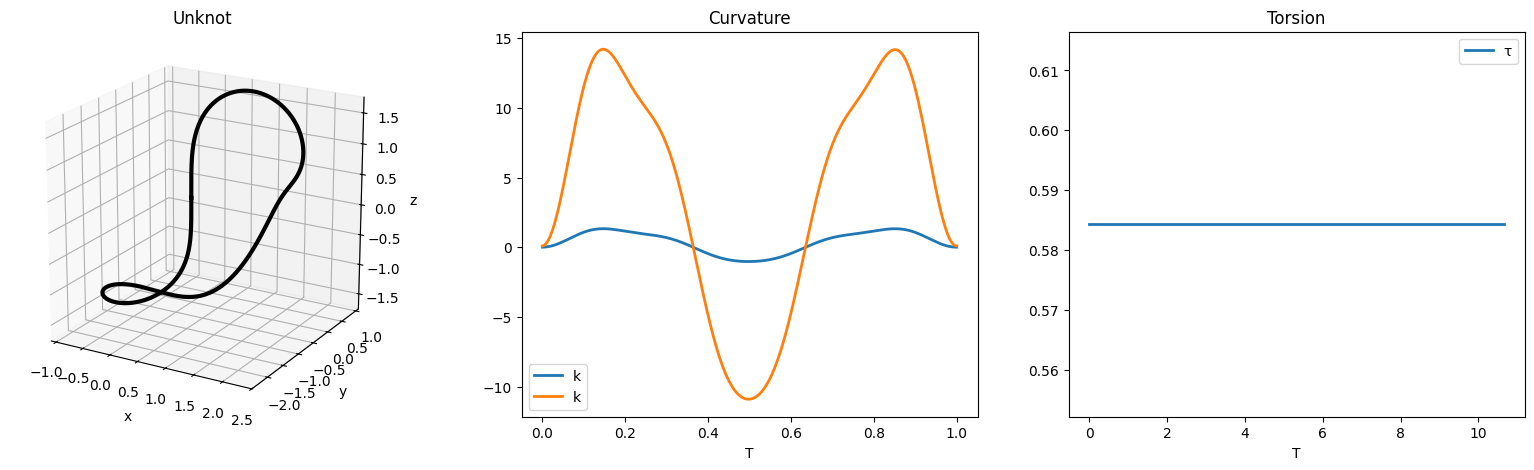

In [18]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm


name = 'R_z_pi_4'

print(name)

B0 = [1., 0., 0.]                       # initial frame
N0 = [0., 1., 0.]
T0 = [0., 0., 1.]

Y0 = np.concatenate([T0, N0, B0])                                           # put the frame in a matrix

# ------ choose the gate in SU(2) representation -------------
n_target   = [0,0,1]                                                        # rotation axis 
phi_target = np.pi/4                                                        # angle, keep in mind the double cover !!! 
U_target   = expm(n_target, phi_target)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target   = adjoint_Representation(U_target)                               # R is the adjoint representation of the 


coeffs = load_coeffs(filename= name, fmt = 'csv', folder= 'results')
coeffs = list(coeffs)
speed  = coeffs.pop()
T_g    = coeffs.pop()
ct     = coeffs.pop()
ampl   = coeffs.pop()
coeffs = np.array(coeffs)
cn     = coeffs[:len(coeffs) //2 ] + 1j* coeffs[len(coeffs) //2: ]

time      = np.linspace(0, T_g, N_points)

g_t       = ampl * np.real(f_in_FS(time, cn))                                      # compute optimized curvature
g_t_intrp = interp1d(time, g_t, kind='cubic', fill_value="extrapolate")            # intrepolated curvature

# torsion   = ct * np.ones(len(time)) 
# tau_fun   = interp1d(time, torsion, kind='cubic', fill_value="extrapolate")
# speed_fun = interp1d(time, speed,   kind='cubic', fill_value="extrapolate")

sol = solve_ivp(    
    fun    = lambda t, y: frenet_rhs(t, y, g_t_intrp, ct, speed),
    t_span = (time[0], time[-1]),
    y0     = Y0,
    t_eval = time,
    method = 'RK45',
    rtol   = 1e-9,
    atol   = 1e-10
)

T_ivp = sol.y[0:3, :].T                         # Frenet frame at any point 
N_ivp = sol.y[3:6, :].T
B_ivp = sol.y[6:9, :].T

r_g = np.cumsum(T_ivp, axis = 0)* speed * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt

B_times_kappa = B_ivp * g_t[:, np.newaxis]                                   # B(t) * |curvature(t)|
integral      = np.trapezoid(B_times_kappa, time*speed, axis=0)              # integral_0^Tg  B(t) * |curvature(t)| dt
tangent_area  = np.linalg.norm( integral)                                    # norm of total tangent area

# ----- Plots -----
fig = plt.figure(figsize=(20, 5))

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev=20, azim=-60)  # <- Change the camera view

# ----- curvature -----
ax1 = fig.add_subplot(132)
ax1.plot(time/T_g, g_t,linewidth = 2, label = "k")
ax1.plot(time/T_g, g_t * T_g,linewidth = 2, label = "k")
# ax1.plot(time,g_t **2,linewidth = 2, label = "k^2")
ax1.set_title("Curvature")
ax1.set_xlabel("T")
ax1.legend()

# ----- torsion -----
ax1 = fig.add_subplot(133)
ax1.plot(time,ct * np.ones(len(time)), linewidth = 2, label = "τ")
ax1.set_title("Torsion")
ax1.set_xlabel("T")
ax1.legend()
    

print("--------------------------------------------------------------------------------------------------------")
print(" Closed curve   Δr =",np.linalg.norm(r_g[0,:] -r_g[-1,:]) )               # print the relative error
print(" Tangent area      =", tangent_area )                                     # print tangent area
print("\n Pulse at  t=0 --> ",g_t[0], "   and at   t = T_g --> ", g_t[-1])
print("\n Torsion    τ = ", ct)
print("--------------------------------------------------------------------------------------------------------")
# print("The Fourier coefficients are: ", cn)   # real parts are for cosines and imaginary parts are for sines


R_F_0  = np.array([-B_ivp[-0,:], N_ivp[-0,:], T_ivp[-0,:]])             # initial frame matrix
R_F_Tg = np.array([-B_ivp[-1,:], N_ivp[-1,:], T_ivp[-1,:]])             # frame matrix at t=T_g 

R_u0   = R_F_Tg @ (R_F_0.T)                                             # Rotation matrix achieved by the curve/pulse

Q     = R_u0 @ (R_u0.T) - np.eye(3)                                     # we need this to check if the matrix is orthogonal using Frobenious norm

fid = fidelity(R_target, R_u0)                                               # compute fidelity

print(" ------------ R_u0 ------------")
print_matrix_sci(R_u0)
print(" ------------------------------")
print(" ------------ U_0 ------------")
print_matrix_sci(adj_2_SU2(R_u0))
print(" ------------------------------")
print(" ------------ R_target ------------")
print_matrix_sci(R_target)
print(" ------------------------------")
#print("Fidelity          = ", fid)
print("Infidelity        = ", 1- fid)
print("Frobenious norm   = ",np.linalg.matrix_norm(Q, ord= 'fro'))

print(np.max(abs(g_t)),time[-1],ct)




In [ ]:
T_ivp_dot = 

viscm not found, falling back on simple display


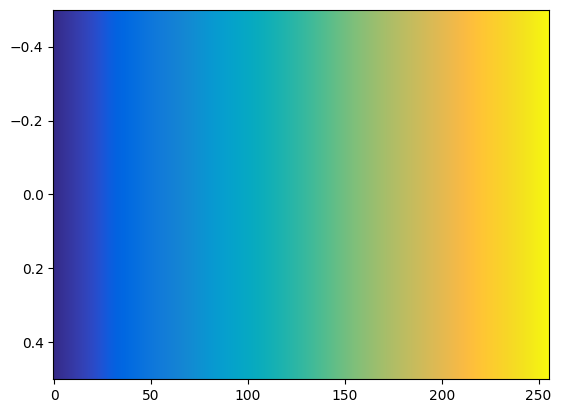

In [19]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

In [20]:
parula_map_2= [ (0.2081, 0.1663, 0.5292), 
                (0.2116238095, 0.1897809524, 0.5776761905), 
                (0.212252381, 0.2137714286, 0.6269714286), 
                (0.2081, 0.2386, 0.6770857143), 
                (0.1959047619, 0.2644571429, 0.7279), 
                (0.1707285714, 0.2919380952, 0.779247619), 
                (0.1252714286, 0.3242428571, 0.8302714286), 
                (0.0591333333, 0.3598333333, 0.8683333333), 
                (0.0116952381, 0.3875095238, 0.8819571429), 
                (0.0059571429, 0.4086142857, 0.8828428571), 
                (0.0165142857, 0.4266, 0.8786333333), 
                (0.032852381, 0.4430428571, 0.8719571429), 
                (0.0498142857, 0.4585714286, 0.8640571429), 
                (0.0629333333, 0.4736904762, 0.8554380952), 
                (0.0722666667, 0.4886666667, 0.8467), 
                (0.0779428571, 0.5039857143, 0.8383714286), 
                (0.079347619, 0.5200238095, 0.8311809524), 
                (0.0749428571, 0.5375428571, 0.8262714286), 
                (0.0640571429, 0.5569857143, 0.8239571429), 
                (0.0487714286, 0.5772238095, 0.8228285714), 
                (0.0343428571, 0.5965809524, 0.819852381), 
                (0.0265, 0.6137, 0.8135), 
                (0.0238904762, 0.6286619048, 0.8037619048), 
                (0.0230904762, 0.6417857143, 0.7912666667), 
                (0.0227714286, 0.6534857143, 0.7767571429), 
                (0.0266619048, 0.6641952381, 0.7607190476), 
                (0.0383714286, 0.6742714286, 0.743552381), 
                (0.0589714286, 0.6837571429, 0.7253857143), 
                (0.0843, 0.6928333333, 0.7061666667), 
                (0.1132952381, 0.7015, 0.6858571429), 
                (0.1452714286, 0.7097571429, 0.6646285714), 
                (0.1801333333, 0.7176571429, 0.6424333333), 
                (0.2178285714, 0.7250428571, 0.6192619048), 
                (0.2586428571, 0.7317142857, 0.5954285714), 
                (0.3021714286, 0.7376047619, 0.5711857143), 
                (0.3481666667, 0.7424333333, 0.5472666667), 
                (0.3952571429, 0.7459, 0.5244428571), 
                (0.4420095238, 0.7480809524, 0.5033142857), 
                (0.4871238095, 0.7490619048, 0.4839761905), 
                (0.5300285714, 0.7491142857, 0.4661142857),
                (0.5708571429, 0.7485190476, 0.4493904762), 
                (0.609852381, 0.7473142857, 0.4336857143), 
                (0.6473, 0.7456, 0.4188), 
                (0.6834190476, 0.7434761905, 0.4044333333), 
                (0.7184095238, 0.7411333333, 0.3904761905), 
                (0.7524857143, 0.7384, 0.3768142857), 
                (0.7858428571, 0.7355666667, 0.3632714286), 
                (0.8185047619, 0.7327333333, 0.3497904762), 
                (0.8506571429, 0.7299, 0.3360285714), 
                (0.8824333333, 0.7274333333, 0.3217), 
                (0.9139333333, 0.7257857143, 0.3062761905), 
                (0.9449571429, 0.7261142857, 0.2886428571), 
                (0.9738952381, 0.7313952381, 0.266647619), 
                (0.9937714286, 0.7454571429, 0.240347619), 
                (0.9990428571, 0.7653142857, 0.2164142857), 
                (0.9955333333, 0.7860571429, 0.196652381), 
                (0.988, 0.8066, 0.1793666667), 
                (0.9788571429, 0.8271428571, 0.1633142857), 
                (0.9697, 0.8481380952, 0.147452381), 
                (0.9625857143, 0.8705142857, 0.1309), 
                (0.9588714286, 0.8949, 0.1132428571), 
                (0.9598238095, 0.9218333333, 0.0948380952), 
                (0.9661, 0.9514428571, 0.0755333333), 
                (0.9763, 0.9831, 0.0538)]

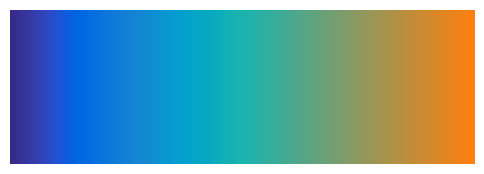

In [21]:
parula_map_3 = [(0.2081, 0.1663, 0.5292), 
                (0.2116238095, 0.1897809524, 0.5776761905), 
                (0.212252381, 0.2137714286, 0.6269714286), 
                (0.2081, 0.2386, 0.6770857143), 
                (0.1959047619, 0.2644571429, 0.7279), 
                (0.1707285714, 0.2919380952, 0.779247619), 
                (0.1252714286, 0.3242428571, 0.8302714286), 
                (0.0591333333, 0.3598333333, 0.8683333333), 
                (0.0116952381, 0.3875095238, 0.8819571429), 
                (0.0059571429, 0.4086142857, 0.8828428571), 
                (0.0165142857, 0.4266, 0.8786333333), 
                (0.032852381, 0.4430428571, 0.8719571429), 
                (0.0498142857, 0.4585714286, 0.8640571429), 
                (0.0629333333, 0.4736904762, 0.8554380952), 
                (0.0722666667, 0.4886666667, 0.8467), 
                (0.0779428571, 0.5039857143, 0.8383714286), 
                (0.079347619, 0.5200238095, 0.8311809524), 
                (0.0749428571, 0.5375428571, 0.8262714286), 
                (0.0640571429, 0.5569857143, 0.8239571429), 
                (0.0487714286, 0.5772238095, 0.8228285714), 
                (0.0343428571, 0.5965809524, 0.819852381), 
                (0.0265, 0.6137, 0.8135), 
                (0.0238904762, 0.6286619048, 0.8037619048), 
                (0.0230904762, 0.6417857143, 0.7912666667), 
                (0.0227714286, 0.6534857143, 0.7767571429), 
                (0.0266619048, 0.6641952381, 0.7607190476), 
                (0.0383714286, 0.6742714286, 0.743552381), 
                (0.0589714286, 0.6837571429, 0.7253857143), 
                (0.0843, 0.6928333333, 0.7061666667), 
                (0.1132952381, 0.7015, 0.6858571429)]

# take up to the greenish part
blue_to_green = np.array(parula_map_3)

# define your orange target
orange = np.array([1.0, 0.49803921568, 0.05490196078])

# build transition from last green to orange
n_interp = 30  # number of steps in green→orange transition
green_to_orange = np.linspace(blue_to_green[-1], orange, n_interp)

# combine
custom_map_2 = np.vstack((blue_to_green, green_to_orange))

# make matplotlib colormap
cmap_2 = LinearSegmentedColormap.from_list("blue_green_orange", custom_map_2)

# quick test plot
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', cmap=cmap_2)
plt.axis("off")
plt.show()

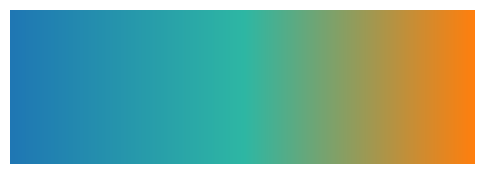

In [22]:
# colors
blue   = np.array([0.1215686, 0.4666667, 0.7058824])  # custom blue
green  = np.array([0.1132952381, 0.7015, 0.6858571429])  # taken from parula tail
green =  np.array([0.1801333333, 0.7176571429, 0.6424333333])
orange = np.array([1.0, 0.49803921568, 0.05490196078])   # target orange

# number of interpolation steps per section
n_blue_green   = 60
n_green_orange = 60

# interpolate blue -> green
blue_to_green = np.linspace(blue, green, n_blue_green, endpoint=False)

# interpolate green -> orange
green_to_orange = np.linspace(green, orange, n_green_orange)

# combine
custom_map_3 = np.vstack((blue_to_green, green_to_orange))

# make matplotlib colormap
cmap_3 = LinearSegmentedColormap.from_list("blue_green_orange", custom_map_3)

# test plot
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', cmap=cmap_3)
plt.axis("off")
plt.show()

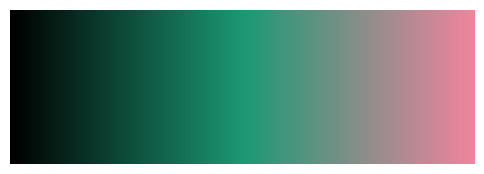

In [23]:
# colors
blackk = np.array([0., 0., 0.])  # custom blue
greenn = np.array([0.112, 150/250, 114/250])  # taken from parula tail
pinkk  = np.array([0.949, 0.517, 0.623])   # target orange

# number of interpolation steps per section
n_black_green = 60
n_green_pink  = 60

# interpolate blue -> green
black_to_green = np.linspace(blackk, greenn, n_black_green, endpoint=False)

# interpolate green -> orange
green_to_pink = np.linspace(greenn, pinkk, n_green_pink)

# combine
custom_map_4 = np.vstack((black_to_green, green_to_pink))

# make matplotlib colormap
cmap_4 = LinearSegmentedColormap.from_list("black_green_pink", custom_map_4)

# test plot
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', cmap=cmap_4)
plt.axis("off")
plt.show()

In [24]:
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap: blue -> black -> red
colors = [(31/255, 119/255, 180/255),(44/255, 160/255, 44/255), (1.0, 0.498, 0.055)]  # RGB tuples
colors =  [(31/255, 119/255, 180/255),(0.58, 0.41, 0.74), (0.839, 0.152, 0.156)]
colors = parula_map_2      # parula like
colors = custom_map_2
colors = custom_map_3
colors = custom_map_4
custom_cmap = LinearSegmentedColormap.from_list("blue_black_red", colors, N=256)


# Break curve into segments
plot_points   = r_g.reshape(-1, 1, 3)
segments = np.concatenate([plot_points[:-1], plot_points[1:]], axis=1)
# Color values (e.g., z, t, or arc length)
values = time[:-1]  # must match segments
norm   = Normalize(vmin=values.min(), vmax=values.max())
"""  colors = cm.coolwarm(norm(values)) """ 
colors = custom_cmap(norm(values))
# Build the colored line
lc = Line3DCollection(segments, colors=colors, linewidth=4)
# Plot

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.add_collection3d(lc)


# ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev=20, azim=-125)  # <- Change the camera view


R_z_pi_4
--------------------------------------------------------------------------------------------------------
 Closed curve   Δr = 4.6778480045838614e-07

 Pulse at  t=0 -->  0.009268548828775508    and at   t = T_g -->  0.009268548828775508

 Torsion    τ =  0.584323357
--------------------------------------------------------------------------------------------------------
 ------------ R_u0 ------------
/                                \
| 3.828e-07 -1.000e+00 -1.543e-07|
| 1.000e+00  3.833e-07  1.616e-07|
|-1.615e-07 -1.544e-07  1.000e+00|
\                                /
 ------------------------------
 ------------ U_0 ------------
/                     \
| 7.071e-01+7.071e-01j  2.540e-09-1.117e-07j|
|-2.540e-09-1.117e-07j  7.071e-01-7.071e-01j|
\                     /
 ------------------------------
 ------------ R_target ------------
/                                \
|-1.000e+00  0.000e+00 -1.225e-16|
| 0.000e+00  1.000e+00  0.000e+00|
| 1.225e-16  0.000e+00 -1.000e+00|
\

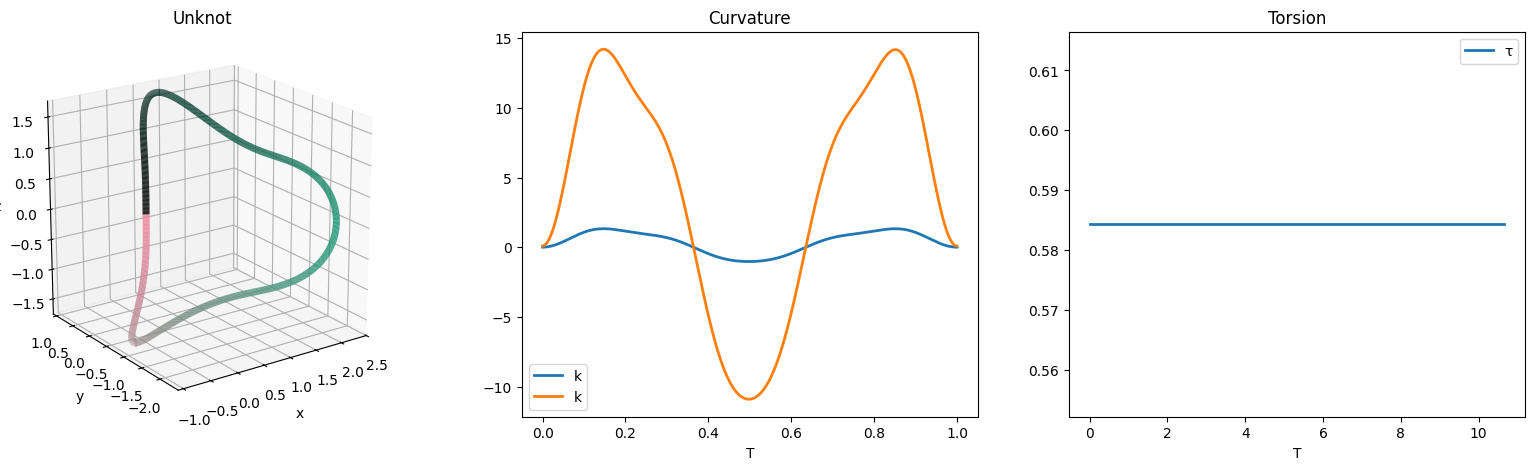

In [25]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm


name = 'R_z_pi_4_DR_BEST_2'
name = 'R_z_pi_4'

print(name)

B0 = [1., 0., 0.]                       # initial frame
N0 = [0., 1., 0.]
T0 = [0., 0., 1.]

Y0 = np.concatenate([T0, N0, B0])                                           # put the frame in a matrix

# ------ choose the gate in SU(2) representation -------------
n_target   = [0,1,0]                                                        # rotation axis 
phi_target = np.pi/2                                                        # angle, keep in mind the double cover !!! 
U_target   = expm(n_target, phi_target)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target   = adjoint_Representation(U_target)                               # R is the adjoint representation of the 


coeffs = load_coeffs(filename= name, fmt = 'csv', folder= 'results')
coeffs = list(coeffs)
speed  = coeffs.pop()
T_g    = coeffs.pop()
ct     = coeffs.pop()
ampl   = coeffs.pop()
coeffs = np.array(coeffs)
cn     = coeffs[:len(coeffs) //2 ] + 1j* coeffs[len(coeffs) //2: ]

time      = np.linspace(0, T_g, N_points)

g_t       = ampl * np.real(f_in_FS(time, cn))                                      # compute optimized curvature
g_t_intrp = interp1d(time, g_t, kind='cubic', fill_value="extrapolate")            # intrepolated curvature

# torsion   = ct * np.ones(len(time)) 
# tau_fun   = interp1d(time, torsion, kind='cubic', fill_value="extrapolate")
# speed_fun = interp1d(time, speed,   kind='cubic', fill_value="extrapolate")

sol = solve_ivp(    
    fun    = lambda t, y: frenet_rhs(t, y, g_t_intrp, ct, speed),
    t_span = (time[0], time[-1]),
    y0     = Y0,
    t_eval = time,
    method = 'RK45',
    rtol   = 1e-9,
    atol   = 1e-10
)

T_ivp = sol.y[0:3, :].T                         # Frenet frame at any point 
N_ivp = sol.y[3:6, :].T
B_ivp = sol.y[6:9, :].T

r_g = np.cumsum(T_ivp, axis = 0)* speed * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt

# ----- Plots -----
fig = plt.figure(figsize=(20, 5))


# Break curve into segments
plot_points   = r_g.reshape(-1, 1, 3)
segments = np.concatenate([plot_points[:-1], plot_points[1:]], axis=1)
# Color values (e.g., z, t, or arc length)
values = time[:-1]  # must match segments
norm   = Normalize(vmin=values.min(), vmax=values.max())
"""  colors = cm.coolwarm(norm(values)) """ 
colors = custom_cmap(norm(values))
# Build the colored line
lc = Line3DCollection(segments, colors=colors, linewidth=5)
# Plot

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.add_collection3d(lc)


# ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev=20, azim=-125)  # <- Change the camera view

# ----- curvature -----
ax1 = fig.add_subplot(132)
ax1.plot(time/T_g, g_t,linewidth = 2, label = "k")
ax1.plot(time/T_g, g_t * T_g,linewidth = 2, label = "k")
# ax1.plot(time,g_t **2,linewidth = 2, label = "k^2")
ax1.set_title("Curvature")
ax1.set_xlabel("T")
ax1.legend()

# ----- torsion -----
ax1 = fig.add_subplot(133)
ax1.plot(time,ct * np.ones(len(time)), linewidth = 2, label = "τ")
ax1.set_title("Torsion")
ax1.set_xlabel("T")
ax1.legend()
    

print("--------------------------------------------------------------------------------------------------------")
print(" Closed curve   Δr =",np.linalg.norm(r_g[0,:] -r_g[-1,:]) )               # print the relative error
print("\n Pulse at  t=0 --> ",g_t[0], "   and at   t = T_g --> ", g_t[-1])
print("\n Torsion    τ = ", ct)
print("--------------------------------------------------------------------------------------------------------")
# print("The Fourier coefficients are: ", cn)   # real parts are for cosines and imaginary parts are for sines


R_F_0  = np.array([-B_ivp[-0,:], N_ivp[-0,:], T_ivp[-0,:]])             # initial frame matrix
R_F_Tg = np.array([-B_ivp[-1,:], N_ivp[-1,:], T_ivp[-1,:]])             # frame matrix at t=T_g 

R_u0   = R_F_Tg @ (R_F_0.T)                                             # Rotation matrix achieved by the curve/pulse

Q     = R_u0 @ (R_u0.T) - np.eye(3)                                     # we need this to check if the matrix is orthogonal using Frobenious norm

fid = fidelity(R_target, R_u0)                                               # compute fidelity

print(" ------------ R_u0 ------------")
print_matrix_sci(R_u0)
print(" ------------------------------")
print(" ------------ U_0 ------------")
print_matrix_sci(adj_2_SU2(R_u0))
print(" ------------------------------")
print(" ------------ R_target ------------")
print_matrix_sci(R_target)
print(" ------------------------------")
#print("Fidelity          = ", fid)
print("Infidelity        = ", 1- fid)
print("Frobenious norm   = ",np.linalg.matrix_norm(Q, ord= 'fro'))

print(np.max(abs(g_t)),time[-1],ct)


fig.savefig("test_4.svg")



Z_gate


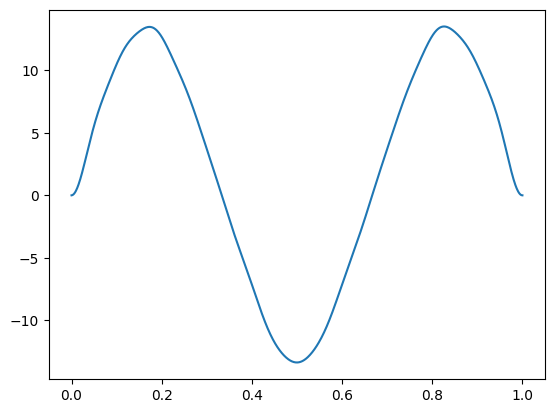

In [56]:
name = 'Z_gate'
print(name)

# ------ choose the gate in SU(2) representation -------------
n_target   = [0,0,1]                                                        # rotation axis 
phi_target = np.pi/2                                                        # angle, keep in mind the double cover !!! 
U_target   = expm(n_target, phi_target)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target   = adjoint_Representation(U_target)                               # R is the adjoint representation of the 


coeffs = load_coeffs(filename= name, fmt = 'csv', folder= 'results')        # load the .csv document    
coeffs = list(coeffs)                                                       # convert it to a list so that you can easily delete each element you get
speed  = coeffs.pop()                                                       # get the speed of the curve
T_g    = coeffs.pop()                                                       # gate time
ct     = coeffs.pop()                                                       # torsion
ampl   = coeffs.pop()                                                       # amplitude coefficient for the curvature (see few linew below)
coeffs = np.array(coeffs)                                                   #  
cn     = coeffs[:len(coeffs) //2 ] + 1j* coeffs[len(coeffs) //2: ]          # Fourier coefficients

N_points  = 2**10                                                           # total points for curve/simulation etc
time      = np.linspace(0, T_g, N_points)                                   # time vector

pulse     = ampl * speed *np.real(f_in_FS(time, cn))                        # compute optimized curvature


plt.plot(time/T_g, pulse *T_g )

It is in our favour to minimize $T_{SCQC}\cdot\tau$ since it affects the (experimental) gate time in our case is given by 
$$
T_{\rm exp} = 2\frac{\tau\cdot T_{SCQC}}{\chi}\, ,
$$
wher $\chi$ is given my the experimental setup and the factor of $2$ is due to the constant torsion approach desing.

So let's see what's the value of this product for the constant torsion curves that we are using as ansatz here.

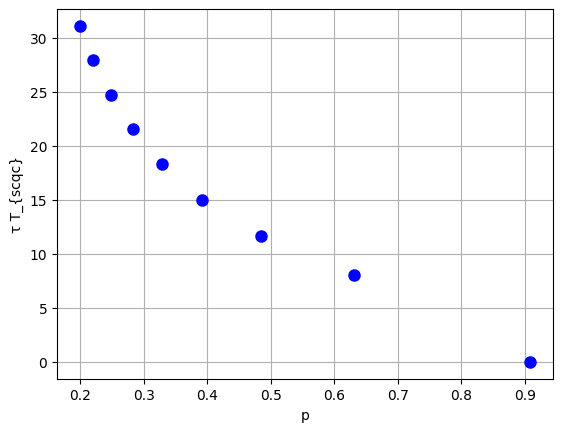

,p,tau,speed,N,T_scqc,T⋅τ
0,0.9089,0.0002,1.8178,2.0000,16.8770,0.0040
1,0.6309,0.6018,1.2619,3.0000,13.4477,8.0934
2,0.4847,0.8978,0.9693,4.0000,13.0091,11.6792
3,0.3921,1.1709,0.7842,5.0000,12.8370,15.0308
4,0.3287,1.4354,0.6574,6.0000,12.7499,18.3009
5,0.2828,1.6951,0.5656,7.0000,12.6994,21.5266
6,0.2481,1.9521,0.4961,8.0000,12.6673,24.7283
7,0.2209,2.2077,0.4417,9.0000,12.6457,27.9177
8,0.1990,2.4620,0.3980,10.0000,12.6303,31.0961


In [126]:
points = 2**15                                                  # points for computations
pp      = [0.9089085, 0.63093, 0.48465,  0.3920856, 0.3287, 0.2828, 0.248060, 0.220853, 0.1990026]                    # geometrical modulus needed for the elliptic functions

N_of_periods_a = []
N_of_periods_b = []
tau = []
speedd = []
KK = []

for p in pp:
    p_2    = p**2                                                   # we use p^2 for the elliptic functions/integrals

    s      = np.linspace(0.,2*p*2*K_(p_2),points)                 # arclecngth. s[-1] is defined by the  ********* EXPLAIN ABOUT THE FINAL VALUE!!!!
    x      = k_0*s / (2*p)                                          # our free parameter

    E_p    = E_(p_2)                                                # Complete elliptic integral of Second kind

    sigma_2  = (1/p**2) * (2*E_p/K_(p_2) - 1)                       # see Eq(8) in "Backlund transformations and knots of constant torsion" 
    sigma    = np.sqrt(sigma_2)                                     # goes to zero at    p = 0.908908557548499

    mu    = (1/4) * np.sqrt( (p**-2 - sigma**2)**2 + 4*sigma**2)    # parameter needed for the analytics, see pg 8-9
    m     = (16*mu**2) / ((p**-2 + sigma**2)**2)                    # --
    a     = 4*mu / (p* (p**-2 + sigma**2))                          # --

    lambda_1 = (sigma**2 - p**-2 + 2) / 4                           # --

    q  = (p**-2 - 1) * (p**-2 - sigma**2) / (2*(p**-2 + sigma**2))                                              # constant factor, see the equation
    dx = x[1] - x[0]                                                                                            # integration step

    theta_x  = -(p*sigma/mu) * ( lambda_1*np.cumsum(np.ones(points)) + q * np.cumsum(1/(1-m*sn_(x,p_2)**2)))*dx # final formula, numerical integration

    delta_theta_num = (theta_x[-1] - theta_x[0]) / (2*np.pi)                                                     # Δθ/2π numerical value
    delta_theta     = -2*K_(p_2) * lambda_func(p,sigma) / (2*np.pi)                                              # Δθ/2π analytical value

    # print("                 Δθ/2π")
    # print("Numerical  =",delta_theta_num)
    # print("Analytical =",delta_theta * s[-1]/(2*p*2*K_(p**2)))                                                  # multiply with the number of "periods"
    
    N_of_periods_a.append(abs(1/delta_theta_num))
    N_of_periods_b.append(abs(1/(delta_theta * s[-1]/(2*p*2*K_(p**2)))))
    tau.append(sigma/2)
    speedd.append(2*p)
    KK.append(K_(p_2))


#speed = 2*p
# T_scqc =
# print(tau)

tau             = np.array(tau)
speedd          = np.array(speedd)
KK              = np.array(KK)
N_of_periods_a  = np.array(N_of_periods_a)

T_dot_tau = tau * speedd * 2*KK * N_of_periods_a
T_scqc    = speedd* 2* KK *N_of_periods_a

plt.plot(pp,T_dot_tau, 'o', linestyle='None', markersize=8, color='blue')
plt.xlabel('p')
plt.ylabel('τ T_{scqc}')
plt.grid(True)
plt.show()

from IPython.display import display
import pandas as pd

# creating a DataFrame
dict = { 'p': pp,
    'tau': tau,
    'speed': speedd,
    #'K(p²)': KK,
    'N': np.round(N_of_periods_a),
    'T_scqc':T_scqc ,
    'T⋅τ': T_dot_tau }

df = pd.DataFrame(dict)
# displaying the DataFrame
df.style.format("{:.4f}")


EXPERIMENTING WITH THE ZZ noise cancelation 

In [75]:
def pulse_optimizer_X1(c_n, Y0, time, R_target):
    
    T0 = Y0[0:3]                                                                    # inital T, N, B vectors
    N0 = Y0[3:6]                                                                    #
    B0 = Y0[6:9]                                                                    #

    time = np.linspace(0, T_g, 2**10)
    

    curvature = c_n[0] * np.exp(-(time - T_g/2)**2 / (2 * c_n[1]**2)) + c_n[2]
    # torsion   = c_t                                                               # constant torsion
    
    kappa_fun = interp1d(time, curvature, kind='cubic', fill_value="extrapolate")   # interp needed for sole_ivp


    sol = solve_ivp(                                                                # solve FS-equations for a set of (kappa, tau)
        fun    = lambda t, y: frenet_rhs(t, y, kappa_fun, 0, 1, ),
        t_span = (time[0], time[-1]),
        y0     = Y0,
        t_eval = time,
        method = 'RK45',
        rtol   = 1e-9,
        atol   = 1e-9
    )

    T = sol.y[0:3, :].T                                                             # tangent vector T(t)  shape (N,3)
    N = sol.y[3:6, :].T                                                             # normal vector N(t)         (N,3)
    B = sol.y[6:9, :].T                                                             # binormal vector B(t)       (N,3)
    
    eqs = []                                                                     

    R_F_0  = np.array([-B0, N0, T0])                                                # initial frame matrix
    R_F_Tg = np.array([-B[-1,:], N[-1,:], T[-1,:]])                                 # frame matrix at t=T_g 
    R_u0     = R_F_Tg @ (R_F_0.T)                                                   # SO(3) gate matrix

    eqs.append(1- fidelity(R_u0, R_target))                                         # gate fidelity 

    eqs.append(0.0 if np.max(abs(curvature)) < 10 else np.max(abs(curvature)) )

    eqs.append( R_u0[0,0] - R_target[0,0] )                                         # conditions for Ryz(pi/2) in SO(3)
    eqs.append( R_u0[1,1] - R_target[1,1] )                                         # these elements must be zero
    eqs.append( R_u0[2,2] - R_target[2,2] )
    eqs.append( R_u0[0,1] - R_target[0,1] )                                         # 
    eqs.append( R_u0[0,2] - R_target[0,2] )
    eqs.append( R_u0[1,2] - R_target[1,2] )
                  
    eqs.append(0.0 if abs(curvature[0] )  < 1e-2 else abs(curvature[0])  )   # pulse starts from 0
    eqs.append(0.0 if abs(curvature[-1]) < 1e-2 else abs(curvature[-1]) )   # pulse ends at 0

    print(eqs[:])                                                                      # prints the values of the parameters you want to minimize

    return eqs

In [85]:
# ------ choose the gate in SU(2) representation -------------
n_target_1   = [-1,0,0]                                                        # rotation axis 
phi_target_1 = np.pi/2                                                       # angle, keep in mind the double cover !!! 
U_target_1   = expm(n_target_1, phi_target_1)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target_1   = adjoint_Representation(U_target_1)                               # R is the adjoint representation of the 

print(" ------------ U_target -----------")
print(U_target_1)
print(" ---------------------------------")
print(" ------------ R_target -----------")
print_matrix_sci(R_target_1)
print(" ---------------------------------")

B01 = [1., 0., 0.]                       # initial frame
N01 = [0., 1., 0.]
T01 = [0., 0., 1.]

Y01 = np.concatenate([T01, N01, B01])                                           # put the frame in a matrix

""" -------------------------------------- INITIAL GUESS ! -------------------------------------------------------- """



gauss_sigma   = T_g/5                                                      # Width of Gaussian pulse
A             = np.sqrt(np.pi)/ (2* np.sqrt(2) * gauss_sigma)             # Calculate amplitude for pi/2-pulse
t0            = T_g / 2                                                 # Center of the pulse
c             = -0.00
 
cn_1 = np.array([A, gauss_sigma, c])


""" --------------------------------------------------------------------------------------------------------------- """

initial_guess_1 = np.concatenate([cn_1, [1, 0*c_t]])   # initial values/guess

result_X1 = least_squares(pulse_optimizer_X1, initial_guess_1, args=(Y01, T_g, R_target_1, ),
                        method = 'trf', 
                        xtol = 1e-10,
                        gtol = 1e-10)

 ------------ U_target -----------
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]
 ---------------------------------
 ------------ R_target -----------
/                                \
| 1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00 -1.000e+00 -1.225e-16|
| 0.000e+00  1.225e-16 -1.000e+00|
\                                /
 ---------------------------------
[np.float64(0.33983566688843636), 0.0, np.float64(0.0), np.float64(1.019507000665309), np.float64(1.019507000665309), np.float64(0.0), np.float64(0.0), np.float64(-0.9998097201989341), np.float64(0.01291784926918562), np.float64(0.01291784926918562)]
[np.float64(0.3398356406856061), 0.0, np.float64(0.0), np.float64(1.0195069220568185), np.float64(1.0195069220568185), np.float64(0.0), np.float64(0.0), np.float64(-0.9998097217326386), np.float64(0.01291784992389695), np.float64(0.01291784992389695)]
[np.float64(0.33983565986824027), 0.0, np.float64(0.0), np.float64(1.0195069796047207), np.float64(1.019506

In [86]:
result_X1.x

array([ 0.76384593,  1.689371  , -0.00823883,  1.        ,  0.        ])

--------------------------------------------------------------------------------------------------------
 Closed curve   Δr = 3.4343712970338105
 Tangent area      = 3.1415924743578394

 Pulse at  t=0 -->  -0.002958514571889238    and at   t = T_g -->  0.009268548828775508

 Torsion    τ =  0.0
--------------------------------------------------------------------------------------------------------
 ------------ R_u0 ------------
/                                \
| 1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00 -1.000e+00 -6.367e-10|
| 0.000e+00  6.367e-10 -1.000e+00|
\                                /
 ------------------------------
 ------------ R_g -------------
/                                \
| 0.000e+00  1.000e+00  0.000e+00|
|-1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00  0.000e+00  1.000e+00|
\                                /
 ------------------------------
Infidelity        =  1.3158285572245632e-10
1.3342523780207949 10.65711073744028 0.584323357


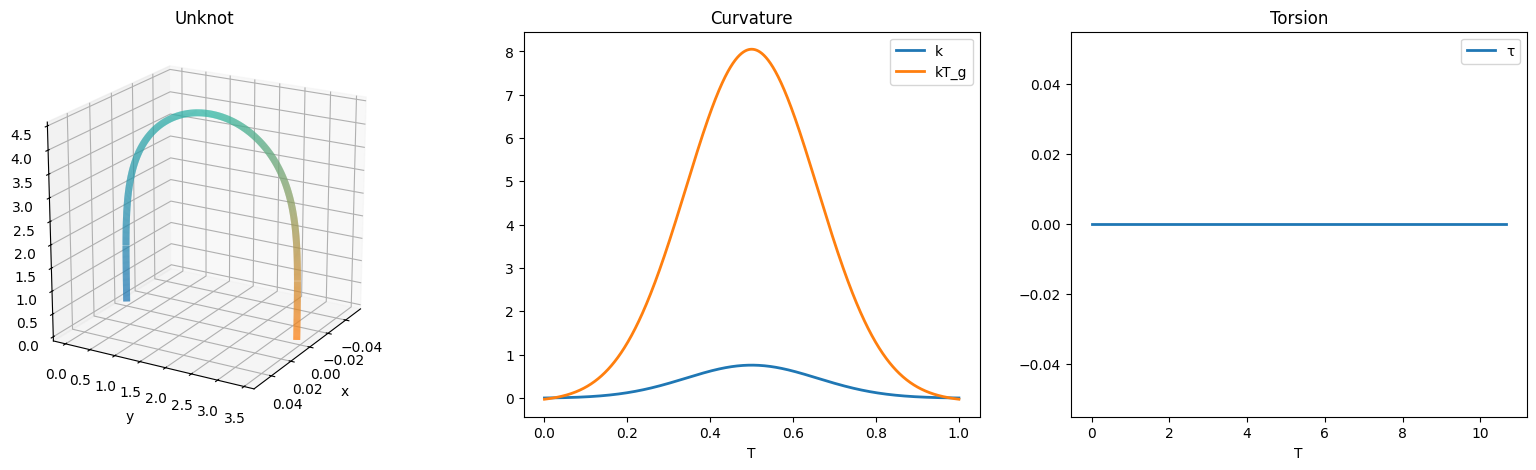

In [98]:
temp_x = result_X1.x


# T_g    = temp_x[-1]                               # total gate time
time      = np.linspace(0, T_g, N_points)

gg_t       = temp_x[0] * np.exp(-(time - t0)**2 / (2 * temp_x[1]**2))  + temp_x[2]                                    # compute optimized curvature

gg_t_intrp = interp1d(time, gg_t, kind='cubic', fill_value="extrapolate")            # intrepolated curvature

sol = solve_ivp(    
    fun    = lambda t, y: frenet_rhs(t, y, gg_t_intrp, 0, 1),
    t_span = (time[0], time[-1]),
    y0     = Y0,
    t_eval = time,
    method = 'RK45',
    rtol   = 1e-9,
    atol   = 1e-10
)

T_ivp = sol.y[0:3, :].T                         # Frenet frame at any point 
N_ivp = sol.y[3:6, :].T                         # normalized vectors up to 9 decimals
B_ivp = sol.y[6:9, :].T

r_g = np.cumsum(T_ivp, axis = 0) * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt
Dr   = np.trapezoid(T_ivp, time, axis=0)

B_times_kappa = B_ivp * gg_t[:, np.newaxis]                                   # B(t) * |curvature(t)|
integral      = np.trapezoid(B_times_kappa, time, axis=0)              # integral_0^Tg  B(t) * |curvature(t)| dt
tangent_area  = np.linalg.norm( integral)                                    # norm of total tangent area

fig = plt.figure(figsize=(20, 5))


# Break curve into segments
plot_points   = r_g.reshape(-1, 1, 3)
segments = np.concatenate([plot_points[:-1], plot_points[1:]], axis=1)
# Color values (e.g., z, t, or arc length)
values = time[:-1]  # must match segments
norm   = Normalize(vmin=values.min(), vmax=values.max())
"""  colors = cm.coolwarm(norm(values)) """ 
colors = custom_cmap(norm(values))
# Build the colored line
lc = Line3DCollection(segments, colors=colors, linewidth=5)
# Plot

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.add_collection3d(lc)


# ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev=20, azim=30)  # <- Change the camera view


# ----- curvature -----
ax1 = fig.add_subplot(132)
ax1.plot(time/T_g,gg_t,linewidth = 2, label = "k")
ax1.plot(time/T_g,gg_t * T_g,linewidth = 2, label = "kT_g")
# ax1.plot(time,g_t **2,linewidth = 2, label = "k^2")
ax1.set_title("Curvature")
ax1.set_xlabel("T")
ax1.legend()

# ----- torsion -----
ax1 = fig.add_subplot(133)
ax1.plot(time,ct * np.zeros(len(time)), linewidth = 2, label = "τ")
ax1.set_title("Torsion")
ax1.set_xlabel("T")
ax1.legend()
    

print("--------------------------------------------------------------------------------------------------------")
#print(" Closed curve   Δr =",np.linalg.norm(r_g[0,:] -r_g[-1,:]) )               # print the relative error
print(" Closed curve   Δr =", np.linalg.norm(Dr) )               # print the relative error
print(" Tangent area      =", tangent_area )                                     # print tangent area
print("\n Pulse at  t=0 --> ",gg_t[0], "   and at   t = T_g --> ", g_t[-1])
print("\n Torsion    τ = ", ct*0)
print("--------------------------------------------------------------------------------------------------------")
# print("The Fourier coefficients are: ", cn)   # real parts are for cosines and imaginary parts are for sines

R_F_0  = np.array([-B_ivp[-0,:], N_ivp[-0,:], T_ivp[-0,:]])             # initial frame matrix
R_F_Tg = np.array([-B_ivp[-1,:], N_ivp[-1,:], T_ivp[-1,:]])             # frame matrix at t=T_g 

R_u0   = R_F_Tg @ (R_F_0.T)                                             # Rotation matrix achieved by the curve/pulse

fid = fidelity(R_target_1, R_u0)                                               # compute fidelity

print(" ------------ R_u0 ------------")
print_matrix_sci(R_u0)
print(" ------------------------------")
print(" ------------ R_g -------------")
print_matrix_sci(R_target)
print(" ------------------------------")
#print("Fidelity          = ", fid)
print("Infidelity        = ", 1- fid)

print(np.max(abs(g_t)),time[-1],ct)

#fig.savefig('Gaussian_X1_pulse.svg')


In [ ]:
def pulse_optimizer_I2(c_n, Y0, time, speed, R_target):
    
    T0 = Y0[0:3]                                                                    # inital T, N, B vectors
    N0 = Y0[3:6]                                                                    #
    B0 = Y0[6:9]                                                                    #

    l         = int((len(c_n)-2)/2)                                                 # first "2*l" elements are the Fourier coeffs
    cn        = c_n[0:l] + 1j*c_n[l :-2]                                            # fourier coefs         (to be optimized)
    ampl      = c_n[-2]                                                             # curvature amplitude   (to be optimized)
    c_t       = c_n[-1]*0                                                             # constant torsion      (to be optimized)


    time = np.linspace(0, T_g, 2**10)
    
    curvature = ampl * f_in_FS(time, cn)                                            # compute the curvature
    # torsion   = c_t                                                               # constant torsion
    

    kappa_fun = interp1d(time, curvature, kind='cubic', fill_value="extrapolate")   # interp needed for sole_ivp

    """
    # tau_fun   = interp1d(time, torsion,   kind='cubic', fill_value="extrapolate")      #
    # taun_fun = c_t
    # speed_fun = interp1d(time, speed,     kind='cubic', fill_value="extrapolate")      #
    # speed_fun = speed 
    """

    sol = solve_ivp(                                                                # solve FS-equations for a set of (kappa, tau)
        fun    = lambda t, y: frenet_rhs(t, y, kappa_fun, c_t, speed, ),
        t_span = (time[0], time[-1]),
        y0     = Y0,
        t_eval = time,
        method = 'RK45',
        rtol   = 1e-9,
        atol   = 1e-9
    )

    T = sol.y[0:3, :].T                                                             # tangent vector T(t)  shape (N,3)
    N = sol.y[3:6, :].T                                                             # normal vector N(t)         (N,3)
    B = sol.y[6:9, :].T                                                             # binormal vector B(t)       (N,3)
    
    # dt  = time[1] - time[0]                                                       # dt needed for Tangent integration
    # r   = np.cumsum(T * speed[:,None], axis=0) * dt                               # curve 
    # r = np.cumsum(T, axis=0) * speed * dt
    # DR  = np.linalg.norm( r[-1,:] - r[0,:] )                                      # closure condition   (part of the cost function)
    r   = np.trapezoid(T, time*speed, axis=0)
    DR  = np.linalg.norm(r)
    eqs = []                                                                        # conte
    eqs.append(DR)                                                                  # closed curve condition

    B_times_kappa = B * curvature[:, np.newaxis]                                    # B(t) * |curvature(t)|
    integral      = np.trapezoid(B_times_kappa,time*speed, axis=0)                  # integral_0^Tg  B(t) * |curvature(t)| dt
    tangent_area  = np.linalg.norm( integral)                                       # norm of total tangent area
    eqs.append(tangent_area/10) 
    

    R_F_0  = np.array([-B0, N0, T0])                                                # initial frame matrix
    R_F_Tg = np.array([-B[-1,:], N[-1,:], T[-1,:]])                                 # frame matrix at t=T_g 
    R_u0     = R_F_Tg @ (R_F_0.T)                                                   # SO(3) gate matrix

    eqs.append(1- fidelity(R_u0, R_target))                                         # gate fidelity 

    eqs.append( R_u0[0,0] - R_target[0,0] )                                         # conditions for Ryz(pi/2) in SO(3)
    eqs.append( R_u0[1,1] - R_target[1,1] )                                         # these elements must be zero
    eqs.append( R_u0[2,2] - R_target[2,2] )
    eqs.append( R_u0[0,1] - R_target[0,1] )                                         # 
    eqs.append( R_u0[0,2] - R_target[0,2] )
    eqs.append( R_u0[1,2] - R_target[1,2] )

    
                                    
    eqs.append(0.0 if abs(np.real(curvature[0]))  < 1e-2 else np.real(curvature[0]) )   # pulse starts from 0
    eqs.append(0.0 if abs(np.real(curvature[-1])) < 1e-2 else np.real(curvature[-1]))   # pulse ends at 0

    print(eqs[0:3])                                                                      # prints the values of the parameters you want to minimize

    return eqs

--------------------------------------------------------------------------------------------------------
Relative error = (2.8363976981407205e-06+0j)
--------------------------------------------------------------------------------------------------------
9.276391464926952 0.9085 0.0197757866532377 1.817


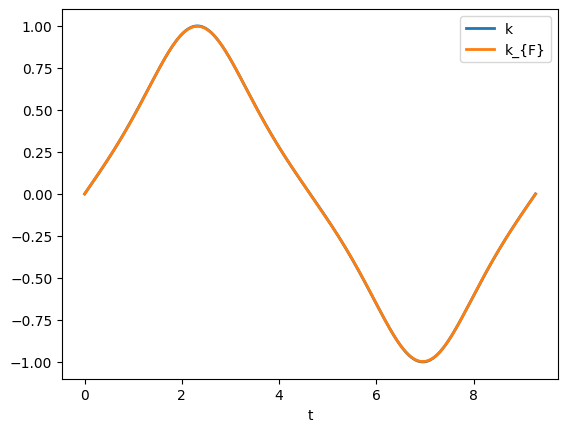

In [217]:
""" Note that the curvature we have is not exactly periodic in the given interval, actually it has 1.5 periods in the time window.
    So, in order to help the Fourier expansion and truncate it to the lowest possible order, we shift a curvature so that it fits
    exactly one period in it. In other words, it is as if we start traversing the curve from a later point """


N_points = 2**10                                         # reduce the number of points to make the later optimization faster
T_g      = x[-1]
time     = np.linspace(0, x[-1], N_points)              # same time window
dt       = time[1] - time[0]                            # dt = dx
y_kappa  = cn_(time - 1*K_(p_2), p_2)
# y_kappa  = np.append(cn_(time - 1*K_(p_2), p_2) ,cn_(time - 1*K_(p_2), p_2))                     # shifted curvature  se the figure below
# time     = np.linspace(0, x[-1], N_points*2)              # same time window
# y_kappa  *= y_kappa                      # try also this

 

# find the lowest order in the Fourier expansion to achieve a good approxmation
cost  = 1.                                              # cost or error
ordr  = 0                                               # highest order
for q in range(1, 7):
    F_order = q
    cn      = fourier_coefs(time, y_kappa, F_order)     # compute the coefs
    f_t     = f_in_FS(time, cn)                         # get the fourier expansion

    denominator = np.sum(f_t**2)                        # compute relative error
    numerator   = np.sum((y_kappa-f_t)**2)  
    relative_error = numerator / denominator            # here
    if relative_error < cost :                  
        cost = relative_error
        ordr = q                                        # store the order
        CN   = cn                                       # store the coefs

F_order = ordr                                          # use the order you found above
f_t     = f_in_FS(time, CN)                             # compute the expansion

denominator    = np.sum(f_t**2)
numerator      = np.sum(np.abs(y_kappa -f_t)**2)           
relative_error = numerator / denominator

print("--------------------------------------------------------------------------------------------------------")
print("Relative error =", relative_error)               # print the relative error
print("--------------------------------------------------------------------------------------------------------")

# ----- plots -------
fig, ax = plt.subplots()
ax.plot(time, y_kappa, label = 'k', linewidth = 2)
ax.plot(time, np.real(f_t),     label = 'k_{F}', linewidth = 2)
ax.set_xlabel("t")
ax.legend();


print(time[-1], p, sigma/2, 2*p)

In [ ]:
# ------ choose the gate in SU(2) representation -------------
# th_z       = 0*np.pi
#n_target   = [1,np.sin(th_z),np.cos(th_z)]                                                        # rotation axis 
n_target_2   = [0,0,1]                                                        # rotation axis 
phi_target_2 = 0*np.pi                                                       # angle, keep in mind the double cover !!! 
U_target_2   = expm(n_target_2, phi_target_2)                                     # U = exp(1j * phi * n \dot sigma_pauli)
R_target_2   = adjoint_Representation(U_target_2)                               # R is the adjoint representation of the 

print(" ------------ U_target -----------")
print(U_target_2)
print(" ---------------------------------")
print(" ------------ R_target -----------")
print_matrix_sci(R_target_2)
print(" ---------------------------------")

B02 = [1., 0., 0.]                       # initial frame
N02 = [0., 1., 0.]
T02 = [0., 0., 1.]

Y02 = np.concatenate([T02, N02, B02])                                           # put the frame in a matrix

""" -------------------------------------- INITIAL GUESS ! -------------------------------------------------------- """
ampl  = 1                                                                   # amplitude --> initial value
c_t   = 0*sigma/2                                                             # torsion   --> initial value sigma/4 for my GATE
speed = 2*p                                                                 # speed here is constant because x = s/2p, 

exta_orders = 1                                                             # add some more fourier orders for more freedom to the solver
CN_extra    = np.ones(exta_orders) * (1 + 1j) *0.000001                        # set the extra coefficients to zero
CNN         = np.append(CN,CN_extra)                                        # total fourier coefs ---> initial values

""" --------------------------------------------------------------------------------------------------------------- """

initial_guess = np.concatenate([np.real(CNN), np.imag(CNN), [ampl, c_t]])   # initial values/guess

result_I1 = least_squares(pulse_optimizer_I2, initial_guess, args=(Y0, time, speed, R_target, ),
                        method = 'trf', 
                        xtol = 1e-9,
                        gtol = 1e-9)

 ------------ U_target -----------
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
 ---------------------------------
 ------------ R_target -----------
/                                \
| 1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00  1.000e+00  0.000e+00|
| 0.000e+00  0.000e+00  1.000e+00|
\                                /
 ---------------------------------
[np.float64(0.04327722766248148), np.float64(8.881784197001253e-17), np.float64(1.7940583463271764e-09)]
[np.float64(0.04327722766164056), np.float64(2.5116210267128736e-08), np.float64(1.793970860752836e-09)]
[np.float64(0.04327722766404805), np.float64(8.881784197001253e-17), np.float64(1.7941607088900469e-09)]
[np.float64(0.04327722766166039), np.float64(8.881784197001253e-17), np.float64(1.793960535678707e-09)]
[np.float64(0.043277227661666647), np.float64(8.881784197001253e-17), np.float64(1.793960535678707e-09)]
[np.float64(0.043277227664035196), np.float64(1.7763568394002506e-16), np.float64(1.7941607088900469e-09)]
[np.float64(0.04327

--------------------------------------------------------------------------------------------------------
 Closed curve   Δr = 2.3081518869026518e-08
 Tangent area      = 2.114397545938118e-11

 Pulse at  t=0 -->  0.00020163864896187151    and at   t = T_g -->  0.00020163864896167823

 Torsion    τ =  0.0
--------------------------------------------------------------------------------------------------------
 ------------ R_u0 ------------
/                                \
| 1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00  1.000e+00  2.384e-11|
| 0.000e+00 -2.384e-11  1.000e+00|
\                                /
 ------------------------------
 ------------ R_g -------------
/                                \
| 1.000e+00  0.000e+00  0.000e+00|
| 0.000e+00  1.000e+00  0.000e+00|
| 0.000e+00  0.000e+00  1.000e+00|
\                                /
 ------------------------------
Infidelity        =  6.661021734188921e-10
Frobenious norm   =  5.652063580404937e-09
0.9997066862242273 9.2763

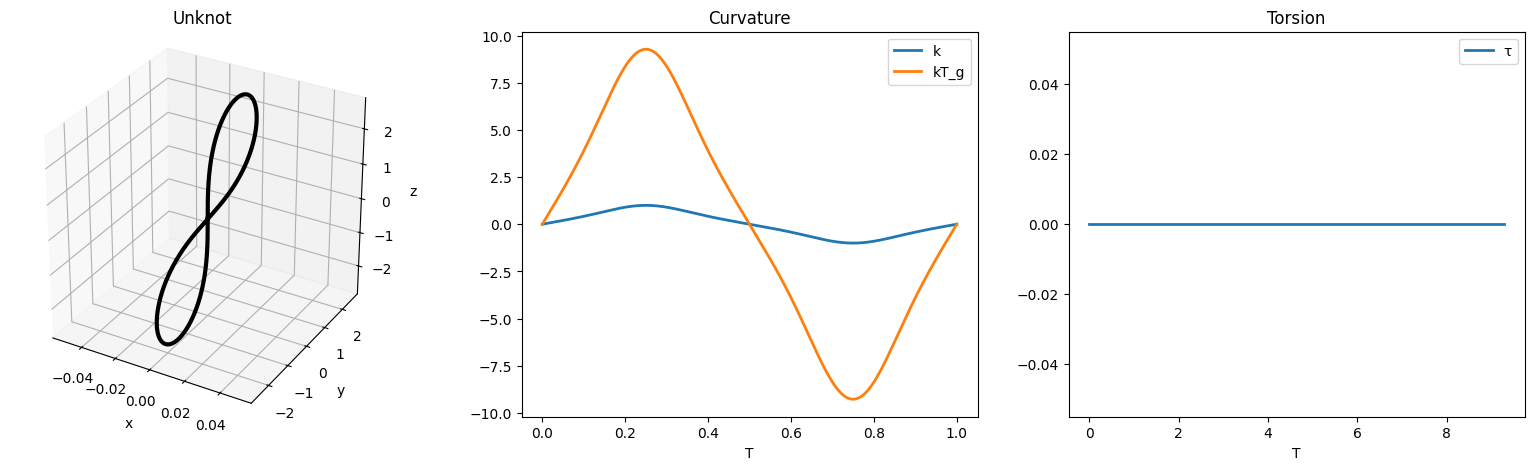

In [ ]:
temp_x = result_I1.x

l      = int((len(temp_x) -2) / 2)
cn     = temp_x[:l] + 1j*temp_x[l:-2]           # fourier coefs
ampl   = temp_x[-2]                             # amplitude coefs
ct     = temp_x[-1]                             # torsion

# T_g    = temp_x[-1]                               # total gate time
time      = np.linspace(0, T_g, N_points)

g_t       = ampl * np.real(f_in_FS(time, cn))                                      # compute optimized curvature
g_t_intrp = interp1d(time, g_t, kind='cubic', fill_value="extrapolate")            # intrepolated curvature

sol = solve_ivp(    
    fun    = lambda t, y: frenet_rhs(t, y, g_t_intrp, ct, speed),
    t_span = (time[0], time[-1]),
    y0     = Y0,
    t_eval = time,
    method = 'RK45',
    rtol   = 1e-9,
    atol   = 1e-10
)

T_ivp = sol.y[0:3, :].T                         # Frenet frame at any point 
N_ivp = sol.y[3:6, :].T                         # normalized vectors up to 9 decimals
B_ivp = sol.y[6:9, :].T

r_g = np.cumsum(T_ivp, axis = 0)* speed * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt
Dr   = np.trapezoid(T_ivp, time*speed, axis=0)

B_times_kappa = B_ivp * g_t[:, np.newaxis]                                   # B(t) * |curvature(t)|
integral      = np.trapezoid(B_times_kappa, time*speed, axis=0)              # integral_0^Tg  B(t) * |curvature(t)| dt
tangent_area  = np.linalg.norm( integral)                                    # norm of total tangent area

# ----- Plots -----
fig = plt.figure(figsize=(20, 5))

# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])

# ----- curvature -----
ax1 = fig.add_subplot(132)
ax1.plot(time/T_g,g_t,linewidth = 2, label = "k")
ax1.plot(time/T_g,g_t * T_g,linewidth = 2, label = "kT_g")
# ax1.plot(time,g_t **2,linewidth = 2, label = "k^2")
ax1.set_title("Curvature")
ax1.set_xlabel("T")
ax1.legend()

# ----- torsion -----
ax1 = fig.add_subplot(133)
ax1.plot(time,ct * np.ones(len(time)), linewidth = 2, label = "τ")
ax1.set_title("Torsion")
ax1.set_xlabel("T")
ax1.legend()
    

print("--------------------------------------------------------------------------------------------------------")
#print(" Closed curve   Δr =",np.linalg.norm(r_g[0,:] -r_g[-1,:]) )               # print the relative error
print(" Closed curve   Δr =", np.linalg.norm(Dr) )               # print the relative error
print(" Tangent area      =", tangent_area )                                     # print tangent area
print("\n Pulse at  t=0 --> ",g_t[0], "   and at   t = T_g --> ", g_t[-1])
print("\n Torsion    τ = ", ct)
print("--------------------------------------------------------------------------------------------------------")
# print("The Fourier coefficients are: ", cn)   # real parts are for cosines and imaginary parts are for sines

R_F_0  = np.array([-B_ivp[-0,:], N_ivp[-0,:], T_ivp[-0,:]])             # initial frame matrix
R_F_Tg = np.array([-B_ivp[-1,:], N_ivp[-1,:], T_ivp[-1,:]])             # frame matrix at t=T_g 

R_u0   = R_F_Tg @ (R_F_0.T)                                             # Rotation matrix achieved by the curve/pulse

Q     = R_u0 @ (R_u0.T) - np.eye(3)                                     # we need this to check if the matrix is orthogonal using Frobenious norm

fid = fidelity(R_target, R_u0)                                               # compute fidelity

print(" ------------ R_u0 ------------")
print_matrix_sci(R_u0)
print(" ------------------------------")
print(" ------------ R_g -------------")
print_matrix_sci(R_target)
print(" ------------------------------")
#print("Fidelity          = ", fid)
print("Infidelity        = ", 1- fid)
print("Frobenious norm   = ",np.linalg.matrix_norm(Q, ord= 'fro'))

print(np.max(abs(g_t)),time[-1],ct)

In [ ]:
def pulse_optimizer_XI(c_n1, c_n2, Y01, Y02, time, speed, R_target_1, R_target_2):
    
    T01 = Y01[0:3]                                                                    # inital T, N, B vectors
    N01 = Y01[3:6]                                                                    #
    B01 = Y01[6:9]                                                                    #

    T02 = Y02[0:3]                                                                    # inital T, N, B vectors
    N02 = Y02[3:6]                                                                    #
    B02 = Y02[6:9]                                                                    #

    l         = int((len(c_n2)-2)/2)                                                 # first "2*l" elements are the Fourier coeffs
    cn        = c_n2[0:l] + 1j*c_n2[l :-2]                                            # fourier coefs         (to be optimized)
    ampl      = c_n2[-2]                                                             # curvature amplitude   (to be optimized)
    c_t       = c_n2[-1]                                                             # constant torsion      (to be optimized)
    
    time = np.linspace(0, T_g, 2**10)
    
    curvature_1 = c_n1[0] * np.exp(-(time - T_g/2)**2 / (2 * c_n1[1]**2)) + c_n1[2]
    curvature_2 = ampl * f_in_FS(time, cn)                                            # compute the curvature
    

    kappa_fun_1 = interp1d(time, curvature_1, kind='cubic', fill_value="extrapolate")   # interp needed for sole_ivp

    sol_1 = solve_ivp(                                                                # solve FS-equations for a set of (kappa, tau)
        fun    = lambda t, y: frenet_rhs(t, y, kappa_fun_1, 0, speed, ),
        t_span = (time[0], time[-1]),
        y0     = Y01,
        t_eval = time,
        method = 'RK45',
        rtol   = 1e-9,
        atol   = 1e-9
    )
    T1 = sol_1.y[0:3, :].T                                                             # tangent vector T(t)  shape (N,3)
    N1 = sol_1.y[3:6, :].T                                                             # normal vector N(t)         (N,3)
    B1 = sol_1.y[6:9, :].T                                                             # binormal vector B(t)       (N,3)
    

    kappa_fun_2 = interp1d(time, curvature_2, kind='cubic', fill_value="extrapolate")   # interp needed for sole_ivp

    sol_2 = solve_ivp(                                                                # solve FS-equations for a set of (kappa, tau)
        fun    = lambda t, y: frenet_rhs(t, y, kappa_fun_2, c_t, speed, ),
        t_span = (time[0], time[-1]),
        y0     = Y02,
        t_eval = time,
        method = 'RK45',
        rtol   = 1e-9,
        atol   = 1e-9
    )

    T2 = sol_2.y[0:3, :].T                                                             # tangent vector T(t)  shape (N,3)
    N2 = sol_2.y[3:6, :].T                                                             # normal vector N(t)         (N,3)
    B2 = sol_2.y[6:9, :].T                                                             # binormal vector B(t)       (N,3)

    eqs = []

    # ---- fidelity of X1  -------------

    R_F_01   = np.array([-B01, N01, T01])                                                # initial frame matrix
    R_F_Tg_1 = np.array([-B1[-1,:], N1[-1,:], T1[-1,:]])                                 # frame matrix at t=T_g 
    R_u0_1   = R_F_Tg_1 @ (R_F_01.T)                                                   # SO(3) gate matrix

    eqs.append(1- fidelity(R_u0_1, R_target_1))                                         # gate fidelity 

    eqs.append( R_u0_1[0,0] - R_target_1[0,0] )                                         # conditions for Ryz(pi/2) in SO(3)
    eqs.append( R_u0_1[1,1] - R_target_1[1,1] )                                         # these elements must be zero
    eqs.append( R_u0_1[2,2] - R_target_1[2,2] )
    eqs.append( R_u0_1[0,1] - R_target_1[0,1] )                                         # 
    eqs.append( R_u0_1[0,2] - R_target_1[0,2] )
    eqs.append( R_u0_1[1,2] - R_target_1[1,2] )
                                    
    eqs.append(0.0 if abs(np.real(curvature_1[0]))  < 1e-1 else np.real(curvature_1[0]) )   # pulse starts from 0
    eqs.append(0.0 if abs(np.real(curvature_1[-1])) < 1e-1 else np.real(curvature_1[-1]))   # pulse ends at 0
    # --------------------------------------

    # ------ closed curve for I2----
    r   = np.trapezoid(T02, time*speed, axis=0)
    DR  = np.linalg.norm(r)                                                                        # conte
    eqs.append(DR)                                                                  # closed curve condition

    # ----- Multiplicative error I2
    B_times_kappa = B02 * curvature_2[:, np.newaxis]                                    # B(t) * |curvature(t)|
    integral      = np.trapezoid(B_times_kappa,time*speed, axis=0)                  # integral_0^Tg  B(t) * |curvature(t)| dt
    tangent_area  = np.linalg.norm( integral)                                       # norm of total tangent area
    eqs.append(tangent_area) 

    R_F_02   = np.array([-B02, N02, T02])                                                # initial frame matrix
    R_F_Tg_2 = np.array([-B2[-1,:], N2[-1,:], T2[-1,:]])                                 # frame matrix at t=T_g 
    R_u0_2   = R_F_Tg_2 @ (R_F_02.T)                                                   # SO(3) gate matrix

    eqs.append(1- fidelity(R_u0_2, R_target_2))                                         # gate fidelity 

    eqs.append( R_u0_2[0,0] - R_target_2[0,0] )                                         # conditions for Ryz(pi/2) in SO(3)
    eqs.append( R_u0_2[1,1] - R_target_2[1,1] )                                         # these elements must be zero
    eqs.append( R_u0_2[2,2] - R_target_2[2,2] )
    eqs.append( R_u0_2[0,1] - R_target_2[0,1] )                                         # 
    eqs.append( R_u0_2[0,2] - R_target_2[0,2] )
    eqs.append( R_u0_2[1,2] - R_target_2[1,2] )
                                    
    eqs.append(0.0 if abs(np.real(curvature_2[0]))  < 1e-1 else np.real(curvature_2[0]) )   # pulse starts from 0
    eqs.append(0.0 if abs(np.real(curvature_2[-1])) < 1e-1 else np.real(curvature_2[-1]))   # pulse ends at 0

    # --- ZZ cancelation
    eqs.append( np.trapezoid( T1[:,0] * T2[:,0] ) )         # T1x T2x
    eqs.append( np.trapezoid( T1[:,0] * T2[:,1] ) )         # T1x T2x
    eqs.append( np.trapezoid( T1[:,0] * T2[:,2] ) )         # T1x T2x

    eqs.append( np.trapezoid( T1[:,1] * T2[:,0] ) )         # T1y T2x
    eqs.append( np.trapezoid( T1[:,1] * T2[:,1] ) )         # T1y T2y
    eqs.append( np.trapezoid( T1[:,1] * T2[:,2] ) )         # T1y T2z

    eqs.append( np.trapezoid( T1[:,2] * T2[:,0] ) )         # T1z T2x
    eqs.append( np.trapezoid( T1[:,2] * T2[:,1] ) )         # T1z T2y
    eqs.append( np.trapezoid( T1[:,2] * T2[:,2] ) )         # T1z T2z


    print(eqs[0:3])                                                                      # prints the values of the parameters you want to minimize

    return eqs


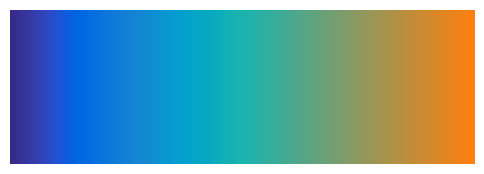

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# your colormap data
parula_map_2 = [(0.2081, 0.1663, 0.5292), (0.2116238095, 0.1897809524, 0.5776761905), 
 (0.212252381, 0.2137714286, 0.6269714286), (0.2081, 0.2386, 0.6770857143), 
 (0.1959047619, 0.2644571429, 0.7279), (0.1707285714, 0.2919380952, 0.779247619), 
 (0.1252714286, 0.3242428571, 0.8302714286), (0.0591333333, 0.3598333333, 0.8683333333), 
 (0.0116952381, 0.3875095238, 0.8819571429), (0.0059571429, 0.4086142857, 0.8828428571), 
 (0.0165142857, 0.4266, 0.8786333333), (0.032852381, 0.4430428571, 0.8719571429), 
 (0.0498142857, 0.4585714286, 0.8640571429), (0.0629333333, 0.4736904762, 0.8554380952), 
 (0.0722666667, 0.4886666667, 0.8467), (0.0779428571, 0.5039857143, 0.8383714286), 
 (0.079347619, 0.5200238095, 0.8311809524), (0.0749428571, 0.5375428571, 0.8262714286), 
 (0.0640571429, 0.5569857143, 0.8239571429), (0.0487714286, 0.5772238095, 0.8228285714), 
 (0.0343428571, 0.5965809524, 0.819852381), (0.0265, 0.6137, 0.8135), 
 (0.0238904762, 0.6286619048, 0.8037619048), (0.0230904762, 0.6417857143, 0.7912666667), 
 (0.0227714286, 0.6534857143, 0.7767571429), (0.0266619048, 0.6641952381, 0.7607190476), 
 (0.0383714286, 0.6742714286, 0.743552381), (0.0589714286, 0.6837571429, 0.7253857143), 
 (0.0843, 0.6928333333, 0.7061666667), (0.1132952381, 0.7015, 0.6858571429)]

# take up to the greenish part
blue_to_green = np.array(parula_map_2)

# define your orange target
orange = np.array([1.0, 0.49803921568, 0.05490196078])

# build transition from last green to orange
n_interp = 30  # number of steps in green→orange transition
green_to_orange = np.linspace(blue_to_green[-1], orange, n_interp)

# combine
custom_map = np.vstack((blue_to_green, green_to_orange))

# make matplotlib colormap
cmap = LinearSegmentedColormap.from_list("blue_green_orange", custom_map)

# quick test plot
gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.figure(figsize=(6, 2))
plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis("off")
plt.show()




In [52]:
arr_1 = np.genfromtxt(
    "Hunter_curvelist1.csv",
    delimiter=",",
    dtype=float,
    encoding="utf-8-sig",   # strips the BOM on the first field
    autostrip=True,         # trims whitespace
    filling_values=np.nan   # puts NaN where cells are empty
)


arr_2 = np.genfromtxt(
    "Hunter_curvelist2.csv",
    delimiter=",",
    dtype=float,
    encoding="utf-8-sig",   # strips the BOM on the first field
    autostrip=True,         # trims whitespace
    filling_values=np.nan   # puts NaN where cells are empty
)



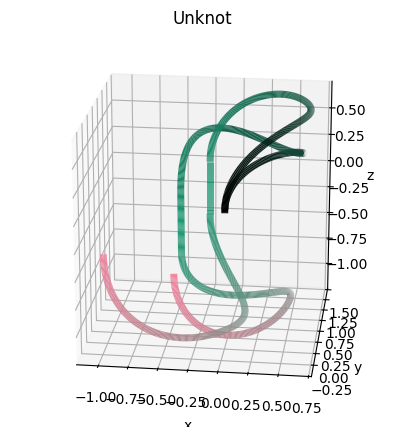

In [117]:
#r_g = np.cumsum(T_ivp, axis = 0)* speed * dt    # integrate Tangent               general case : r_g = np.cumsum(T_ivp * speed[:,None], axis = 0)*dt

r_g = arr_1

# ----- Plots -----
fig = plt.figure(figsize=(20, 5))


# Break curve into segments
plot_points   = r_g.reshape(-1, 1, 3)
segments = np.concatenate([plot_points[:-1], plot_points[1:]], axis=1)
# Color values (e.g., z, t, or arc length)
values = time[:679]  # must match segments
norm   = Normalize(vmin=values.min(), vmax=values.max())
"""  colors = cm.coolwarm(norm(values)) """ 
colors = custom_cmap(norm(values))
# Build the colored line
lc1 = Line3DCollection(segments, colors=colors, linewidth=5)
# Plot


r_g = arr_2

# Break curve into segments
plot_points   = r_g.reshape(-1, 1, 3)
segments = np.concatenate([plot_points[:-1], plot_points[1:]], axis=1)
# Color values (e.g., z, t, or arc length)
values = time[:679]  # must match segments
norm   = Normalize(vmin=values.min(), vmax=values.max())
"""  colors = cm.coolwarm(norm(values)) """ 
colors = custom_cmap(norm(values))
# Build the colored line
lc2 = Line3DCollection(segments, colors=colors, linewidth=5)
# Plot



# ----- 3D curve -----
ax1 = fig.add_subplot(131, projection='3d')
ax1.add_collection3d(lc1)
ax1.add_collection3d(lc2)

# ax1.plot(r_g[:,0], r_g[:,1], r_g[:,2], color='black', linewidth = 3)
ax1.set_title('Unknot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev=20, azim=-83)  # <- Change the camera view

fig.savefig('Hunter_curves.svg')

(1024, 3)